# 1. IMPORTS

In [227]:
import pandas as pd
import numpy as np
from shapely.geometry import Point
from shapely.geometry import Polygon
import geopandas as gpd
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import pickle

from tabulate import tabulate
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr
from collections import Counter
from pyitlib import discrete_random_variable as drv
from itertools import permutations
from sklearn import metrics
import scikitplot as skplt

from sklearn.preprocessing import RobustScaler, MinMaxScaler,StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from boruta import BorutaPy
from pycorrcat.pycorrcat import plot_corr, corr_matrix
from sklearn import ensemble as en

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from scipy import stats
import random 
from random import sample


## 1.1 Definição de funções

In [229]:
def nome_distrito(x):
    for idx, _ in x.iterrows():
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='SAï¿½DE'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='SAÚDE'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='VILA Sï¿½NIA'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='VILA SÔNIA'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='BUTANTï¿½'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='BUTANTÃ'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='CONSOLAï¿½ï¿½O'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='CONSOLAÇÃO'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='TREMEMBï¿½'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='TREMEMBÉ'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='ï¿½GUA RASA'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='ÁGUA RASA'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='SACOMï¿½'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='SACOMÃ'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='Sï¿½O LUCAS'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='SÃO LUCAS'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='CARRï¿½O'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='CARRÃO'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='TATUAPï¿½'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='TATUAPE'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='Sï¿½O MATEUS'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='SÃO MATEUS'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='JARDIM Sï¿½O LUï¿½S'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='JARDIM SÃO LUÍS'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='Sï¿½O DOMINGOS'):
            data_vendas_censo['Nome_do_distrito'].at[idx]=' SÃO DOMINGOS'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='BELï¿½M'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='BELÉM'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='JAGUARï¿½'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='JAGUARÉ'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='SANTA CECï¿½LIA'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='SANTA CECÍLIA'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='Sï¿½O RAFAEL'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='SÃO RAFAEL'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='FREGUESIA DO ï¿½'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='FREGUESIA DO Ó'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='VILA JACUï¿½'):
            data_vendas_censo['Nome_do_distrito'].at[idx]=' VILA JACUÍ'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='CAPï¿½O REDONDO'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='CAPÃO REDONDO'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='JARAGUï¿½'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='JARAGUÁ'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='Sï¿½'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='SÉ'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='Sï¿½O MIGUEL'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='SÃO MIGUEL'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='VILA CURUï¿½ï¿½'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='VILLA CURUÇA'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='LIMï¿½O'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='LIMÃO'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='JAï¿½ANï¿½'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='JAÇANÃ'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='JARDIM ï¿½NGELA'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='JARDIM ÂNGELA'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='JOSï¿½ BONIFï¿½CIO'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='JOSÉ BONIFÁCIO'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='GRAJAï¿½'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='GRAJAÚ'
        if (data_vendas_censo['Nome_do_distrito'].at[idx]=='REPï¿½BLICA'):
            data_vendas_censo['Nome_do_distrito'].at[idx]='REPÚBLICA'
        else:
            data_vendas_censo['Nome_do_distrito']  

# Padrão para plotagens
def data_load(ax1, title, xlabel, ylabel):
    ax1.set_title(title,  fontsize=15)
    ax1.set_xlabel(xlabel, fontsize=15)
    ax1.set_ylabel(ylabel, fontsize=15)
    return None            

def atributo_frequencia(atributo):
    
    # Cria um dicionário de valores contáveis
    atributo_dict = atributo.value_counts().to_dict()
    
    # Armazena valores com Dataframe
    df_atributo_dict = pd.DataFrame(atributo_dict.items(), columns=['Value','Count'])

    # Calcula a frequência de cada valor
    df_atributo_dict['frequency'] = df_atributo_dict['Count'] / df_atributo_dict['Count'].sum()
    
    # Obtém um dicionário para a frequência
    atributo_frequencia = df_atributo_dict.set_index('Value').to_dict()['frequency']
    
    return atributo_frequencia


def frequencias_codificadas(data_frame):
    
    # Cria um Dataframe vazio
    freq_codificada = pd.DataFrame()
    
    # Cria colunas de frequências
    for column in data_frame.columns:
        freq_codificada[column] = data_frame[column].map(atributo_frequencia(data_frame[column]))
        
    return freq_codificada


# Média das porcentagens dos erros (MPE)
def mean_percentage_error(y, yhat):
    return np.mean((y - yhat) / y)
            
               

            

## 1.2 Carregando Dados

In [230]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
data = pd.read_csv(url)

# 2 Descrição dos dados

## 2.1 Observação dos dados

In [231]:
data.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6939,Rua José dos Santos Júnior,Campo Belo,São Paulo,168,3,2,1,R$ 1.600.000
6269,Praça El Salvador,Interlagos,São Paulo,420,3,4,6,R$ 1.800.000
3034,Avenida Moaci,Planalto Paulista,São Paulo,200,4,5,1,R$ 1.650.000
4846,NaN,Jardim das Acácias,São Paulo,120,2,2,3,R$ 1.350.000
8842,Rua Calíope,Jardim Guedala,São Paulo,577,4,3,7,R$ 2.553.191
8447,NaN,Butantã,São Paulo,300,3,1,4,R$ 1.600.000
5549,Rua Deputado Fábio Aranha,Pacaembu,São Paulo,447,4,5,4,R$ 4.000.000
7239,Rua Galiza,Socorro,São Paulo,90,3,1,2,R$ 530.000
7255,Rua Olivério Pilar,Vila Primavera,São Paulo,200,3,3,6,R$ 600.000
5864,Avenida Cupecê,Jardim Prudência,São Paulo,167,2,3,1,R$ 693.000


## 2.2 Formatação e tipos dos dados

In [232]:
data["Valor"].str.split(expand = True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [233]:
data[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = data["Valor"].str.split(expand = True)
data.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [234]:
data["Rua"].str.extract(r'(^[\w ]+)')[:10]

,0
0,Avenida Itacira
1,Rua Aurelia Perez Alvarez
2,Rua Alba Valdez
3,NaN
4,Rua Tobias Barreto
5,Rua Graham Bell
6,Rua Francisco Paulo
7,Rua Guilherme Valente
8,Rua Sagrada Família
9,Rua Tapaji


In [235]:
data["apenas_rua"] = data["Rua"].str.extract(r'(^[\w ]+)')
data["apenas_rua"] = data["apenas_rua"].str.lower().str.strip()
data.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,apenas_rua
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,rua tobias barreto


## 2.3 Junção de Datasets

Precisaremos fazer as criações de recursos e junções com alguns datasets do IBGE e dados censitários da cidade de São Paulo para futuramente termos uma acurácia mais precisa. 

### 2.3.1 Dados de códigos IBGE

Nesse módulo, teremos a base de dados dos códigos do IBGE da cidade de São Paulo.

In [236]:
# Carregando dados de códigos IBGE
ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
pd.read_csv(ibge_url)

,,,,,,,,,,Cod_setor;Cod_Grandes Regi�es;Nome_Grande_Regiao;Cod_UF;Nome_da_UF ;Cod_meso;Nome_da_meso;Cod_micro;Nome_da_micro;Cod_RM;Nome_da_RM;Cod_municipio;Nome_do_municipio;Cod_distrito;Nome_do_distrito;Cod_subdistrito;Nome_do_subdistrito;Cod_bairro;Nome_do_bairro;Situacao_setor;Tipo_setor;V001;V002;V003;V004;V005;V006;V007;V008;V009;V010;V011;V012;
"355030801000001;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;266;800;3",01;2,32;2091,32;8532451,78;2164,55;8673276,78;1227,41;4285771,99;1713,75;5152087,86.0
"355030801000002;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;306;913;2",98;2,09;1650,09;3983441,31;1717,44;4030519,99;1045,78;2572133,32;1468,08;2991546,94.0
"355030801000003;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;189;625;3",31;3,08;1280,43;5474593,06;2349,53;7553913,02;902,97;2735492,52;1786,79;3837674,74.0
"355030801000004;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;181;572;3",16;2,26;1119,59;3572955,1;1859,13;4567289,5;869,09;2122409,02;1567,41;2735383,24.0
"355030801000005;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;240;754;3",14;2,35;1416,9;2240207,58;1581,66;2240109,39;917,71;1570047,75;1356,35;1725877,85.0
...,...,...,...,...,...,...,...,...,...,...
"355030896000243;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;1;96;336;3",5;2,61;772,09;168751,1;814,52;143188,21;467,46;191332,48;699,95;123399,8.0
"355030896000244;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;1;54;209;3",87;2,49;692,5;239941,27;812,93;182516,2;439,33;194034,99;702,1;124952,38.0
"355030896000245;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;1;87;339;3",9;2,54;630,06;329705,22;843,31;260395,9;347,6;228162,66;767,5;181129,99.0
"355030896000246;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;0;38;163;4",29;4,21;597,37;349101;908;244391,67;397,76;436942,16;854,2;550319,43,NaN,NaN


In [237]:
# Carregando dados de códigos IBGE com codificação legível
ibge_sp = pd.read_csv(
    'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv',
    encoding='ISO-8859-1',
    sep=';', thousands='.', decimal=','
)
ibge_sp.dropna(how='all', axis=1, inplace=True)
ibge_sp.head()

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


### 2.3.2 Dados de SP
* Nesse módulo, teremos a base de dados dos endereçõs de São Paulo.

* Vamos criar o recurso **rua** para permitir fazer a junção com a base de dados dos imóveis de São Paulo.

* Vamos selecionar apenas as siglas de São Paulo, pois corre o risco de usar ruas com mesmos nomes e siglas diferentes na junção futuramente.

In [238]:
# Carregando dados de endereços de SP
enderecos = pd.read_csv("datasets/enderecos.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



In [239]:
# Criando recurso 'rua' para junção
enderecos["rua"] = enderecos["tipo_logr"] + " " + enderecos["logr_nome"]
enderecos["rua"] = enderecos["rua"].str.lower().str.strip()

# Selecionando siglas apenas de SP
enderecos = enderecos.query("sigla_uf == 'SP'")

enderecos.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.0,-21.190276,-50.448686,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.0,-22.756531,-47.343738,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.0,-22.743734,-47.348631,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.0,-22.737846,-47.333569,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.0,-22.744283,-47.351588,rua joão bandini


In [240]:
# Junção com a base dados dos imóveis SP
data_geo = pd.merge(left = data, right = enderecos[["rua", "cep", "latitude", "longitude"]], how = "left", left_on = "apenas_rua", right_on = "rua").drop_duplicates(subset=data.columns).query("cep > 0")
data_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,apenas_rua,rua,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,avenida itacira,avenida itacira,11443160.0,-23.975993,-46.201317
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.0,-23.640961,-46.688311
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,rua alba valdez,rua alba valdez,4845200.0,-23.752990,-46.695889
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,NaN,NaN,18125000.0,-23.531043,-47.255023
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,rua tobias barreto,rua tobias barreto,13474663.0,-22.698901,-47.294461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101041,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,rua tapuçu,rua tapuçu,4671185.0,-23.661018,-46.691521
101042,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,rua guararema,rua guararema,13030640.0,-22.922749,-47.076960
101059,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,rua estero belaco,rua estero belaco,4145020.0,-23.616124,-46.632983
101060,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês,R$,2.200,/Mês,rua manuel onha,rua manuel onha,3192100.0,-23.572579,-46.577669


### 2.3.3 Base de Dados Setor Censitário
* Nesse módulo, utilizares dados com o objetivo de usar as geocodificações na base de dados principal.Criaremos os recursos **Point** e **setor_censo** devido à utilização dessas geocodificações e as latitudes e longitudes da base de dados principal.

* Devido à uma perda de tempo enorme no carregamento do **setor_censo** por completo(criamos apenas 10 valores), temos os dados salvos em .csv. Esse arquivo .csv será usado no módulo **2.3.4** ja com alguns recursos adicionados como **Valor_anuncio**(valor colocado no tipo float), **Valor_m2**(Valor do m2) e **Valor_mm**(valor na escala de milhão), além da remoção de dados  **'/Mês', '/Ano', '/Dia'** , pois aluguéis não contam e recursos **Moeda** e **apenas_rua**, pois são inúteis.


In [241]:
setor_censo = gpd.read_file('datasets/35SEE250GC_SIR.shp')
setor_censo.head()

C:\ProgramData\Anaconda3\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.



,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.0,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.0,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.0,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.0,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.0,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


Selecionaremos apenas setor censo de São Paulo, para não corrermos o risco de usarmos setor censo igual de outro município futuramente, então será necessário selecionar agora.

In [242]:
# Selecionando apenas setor censo da cidade de São Paulo
setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == "SÃO PAULO"]

Devido à uma perda de tempo enorme no carregamento do setor_censo por completo(criamos apenas 10 valores), temos os dados salvos em .csv.

In [243]:
# Criando recurso 'Point'
data_geo["Point"] = ""
for i in data_geo.index:
    data_geo["Point"][i] = Point(data_geo["longitude"][i], data_geo["latitude"][i])

# Criando recurso 'setor_censo' limitando até 10 pois demora muito a carregar  
data_geo['setor_censo'] = data_geo["Point"][:10].map(
    lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values
).str[0]   
data_geo

<ipython-input-243-bed27b61417b>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,apenas_rua,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,avenida itacira,avenida itacira,11443160.0,-23.975993,-46.201317,POINT (-46.2013172 -23.975993),NaN
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.0,-23.640961,-46.688311,POINT (-46.6883114 -23.6409612),355030871000023
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,rua alba valdez,rua alba valdez,4845200.0,-23.752990,-46.695889,POINT (-46.6958895 -23.75299),355030830000050
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,NaN,NaN,18125000.0,-23.531043,-47.255023,POINT (-47.2550228 -23.5310431),NaN
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,rua tobias barreto,rua tobias barreto,13474663.0,-22.698901,-47.294461,POINT (-47.2944609 -22.6989009),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101041,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,rua tapuçu,rua tapuçu,4671185.0,-23.661018,-46.691521,POINT (-46.6915206 -23.661018),NaN
101042,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,rua guararema,rua guararema,13030640.0,-22.922749,-47.076960,POINT (-47.0769595 -22.9227492),NaN
101059,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,rua estero belaco,rua estero belaco,4145020.0,-23.616124,-46.632983,POINT (-46.632983 -23.6161237),NaN
101060,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês,R$,2.200,/Mês,rua manuel onha,rua manuel onha,3192100.0,-23.572579,-46.577669,POINT (-46.5776693 -23.5725787),NaN


Recursos que o arquivo .csv ja terá em seus dados no módulo 2.3.4.

In [ ]:
# Removendo dados '/Mês', '/Ano', '/Dia', pois aluguéis não contam
# data_geo = data_geo[data_geo["Tipo_anuncio"].isnull()]

# Criando recurso 'Valor_anuncio' e deixando tipo 'float'
# data_geo["Valor_anuncio"] = data_geo["Valor_anuncio"].str.replace(".","").astype(float)

# Removendo recurso 'Moeda' e 'apenas_rua', pois são inúteis
# data_geo = data_geo.drop(columns=['Moeda','apenas_rua' ])

# Criando recurso 'Valor_m2' como valor do m2
# data_geo["Valor_m2"] = data_geo["Valor_anuncio"]/data_geo["Metragem"]

# Criando recurso 'Valor_mm' como valor na escala de milhão
# data_geo["Valor_mm"] = data_geo["Valor_anuncio"]/1000000

# data_geo.head()

### 2.3.4 Dataset completo e observação dos dados

* Nesse módulo, temos o arquivo .csv com a coluna **setor_censo** completo
* Teremos a junção da base de dados principal e a base de dados de códigos do IBGE

In [244]:
data_geo = pd.read_csv("datasets/dados_geo.csv")
data_geo.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.0,NaN,7.00,7000.000000,Avenida Itacira,4061000.0,-23.615793,-46.648162,POINT (-46.6481622 -23.6157934),3.550309e+14
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.0,NaN,3.70,7459.677419,Rua Aurelia Perez Alvarez,4642020.0,-23.640961,-46.688311,POINT (-46.6883114 -23.6409612),3.550309e+14
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.0,NaN,0.38,3040.000000,Rua Alba Valdez,4845200.0,-23.752990,-46.695889,POINT (-46.6958895 -23.75299),3.550308e+14
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.0,NaN,0.54,5400.000000,Rua Tobias Barreto,3176000.0,-23.549960,-46.588173,POINT (-46.5881729 -23.5499597),3.550308e+14
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.0,NaN,1.98,4500.000000,Rua Graham Bell,4737030.0,-23.593796,-46.760077,POINT (-46.7600773 -23.5937964),3.550309e+14


In [245]:
# Junção da base de dados principal com a base de dados de códigos do IBGE.
data_vendas_censo = pd.merge(left = data_geo, right = ibge_sp, how = "left", left_on = "setor_censo", right_on = "Cod_setor")
data_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.0,NaN,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.0,NaN,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.0,NaN,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.0,NaN,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.0,NaN,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,1500000.0,NaN,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,665000.0,NaN,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5602,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,2300000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,1050000.0,NaN,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


* **V001** - Domicílios particulares permanentes ou pessoas responsáveis por domicílios particulares permanentes 
* **V002** - Moradores em domicílios particulares permanentes ou população residente em domicílios particulares permanentes 
* **V003** - Média do número de moradores em domicílios particulares permanentes (obtida pela divisão de Var2 por Var1)
* **V004** - Variância do número de moradores em domicílios particulares permanentes
* **V005** - Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento
* **V006** - Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)
* **V007** - Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)
* **V008** - Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)
* **V009** - Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)
* **V010** - Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)
* **V011** - Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com rendimento)
* **V012** - Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com rendimento)

In [246]:
data_vendas_censo.iloc[:,:20].head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo,Cod_setor,Cod_Grandes Regiï¿½es
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.0,NaN,7.00,7000.000000,Avenida Itacira,4061000.0,-23.615793,-46.648162,POINT (-46.6481622 -23.6157934),3.550309e+14,3.550309e+14,3.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.0,NaN,3.70,7459.677419,Rua Aurelia Perez Alvarez,4642020.0,-23.640961,-46.688311,POINT (-46.6883114 -23.6409612),3.550309e+14,3.550309e+14,3.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.0,NaN,0.38,3040.000000,Rua Alba Valdez,4845200.0,-23.752990,-46.695889,POINT (-46.6958895 -23.75299),3.550308e+14,3.550308e+14,3.0


In [247]:
data_vendas_censo.iloc[:,20:40].head(3)

,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001
0,Regiï¿½o Sudeste,35.0,Sï¿½o Paulo,3515.0,Metropolitana de Sï¿½o Paulo,35061.0,Sï¿½o Paulo,20.0,RM Sï¿½o Paulo,3550308.0,Sï¿½O PAULO,355030877.0,SAï¿½DE,3.550309e+10,SAï¿½DE,3.550308e+09,Sï¿½O PAULO (todos os setores),1.0,0.0,164.0
1,Regiï¿½o Sudeste,35.0,Sï¿½o Paulo,3515.0,Metropolitana de Sï¿½o Paulo,35061.0,Sï¿½o Paulo,20.0,RM Sï¿½o Paulo,3550308.0,Sï¿½O PAULO,355030871.0,SANTO AMARO,3.550309e+10,SANTO AMARO,3.550308e+09,Sï¿½O PAULO (todos os setores),1.0,0.0,136.0
2,Regiï¿½o Sudeste,35.0,Sï¿½o Paulo,3515.0,Metropolitana de Sï¿½o Paulo,35061.0,Sï¿½o Paulo,20.0,RM Sï¿½o Paulo,3550308.0,Sï¿½O PAULO,355030830.0,GRAJAï¿½,3.550308e+10,GRAJAï¿½,3.550308e+09,Sï¿½O PAULO (todos os setores),1.0,0.0,142.0


In [248]:
data_vendas_censo.iloc[:,40:].head(3)

,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,437.0,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,425.0,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,493.0,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88


## 2.4 Formatação e tipos dos dados completos

In [249]:
# Nomes dos distritos legivelmente
nome_distrito(data_vendas_censo)

In [250]:
# Excluindo coluna inútil
data_vendas_censo.drop('Tipo_anuncio', axis=1, inplace=True)

# Excluindo colunas com valores únicos 
data_vendas_censo.drop(['Cidade','Cod_Grandes Regiï¿½es','Nome_Grande_Regiao','Cod_UF','Nome_da_UF ','Cod_meso','Nome_da_meso','Cod_micro','Nome_da_micro','Cod_RM',
                       'Nome_da_RM','Cod_municipio','Nome_do_municipio','Cod_bairro','Nome_do_bairro'], axis=1, inplace=True)

# Excluindo colunas que se repetem
data_vendas_censo.drop(['Cod_subdistrito','Nome_do_subdistrito','Cod_setor'], axis=1, inplace=True)

# Excluindo colunas que ja foram utilizadas e se tornarão inúteis
data_vendas_censo.drop(['Rua','latitude','longitude','Point'], axis=1, inplace=True)


## 2.5 Checando e Tratando os dados vazios

In [251]:
data_vendas_censo.isna().sum()

Bairro                8
Metragem              0
Quartos               0
Banheiros             0
Vagas                 0
Valor                 0
Valor_anuncio         0
Valor_mm              0
Valor_m2              0
rua                   0
cep                   0
setor_censo         285
Cod_distrito        289
Nome_do_distrito    289
Situacao_setor      289
Tipo_setor          289
V001                289
V002                289
V003                289
V004                289
V005                289
V006                289
V007                289
V008                289
V009                289
V010                289
V011                289
V012                289
dtype: int64

In [252]:
# Colocando nomes dos bairros vazios de acordo com as ruas
data_vendas_censo['Bairro'].iloc[4454] = 'Vila Mariana'
data_vendas_censo['Bairro'].iloc[4477] = 'Morumbi'
data_vendas_censo['Bairro'].iloc[4540] = 'Morumbi'
data_vendas_censo['Bairro'].iloc[4740] = 'Morumbi'
data_vendas_censo['Bairro'].iloc[4765] = 'Morumbi'
data_vendas_censo['Bairro'].iloc[4898] = 'Morumbi'
data_vendas_censo['Bairro'].iloc[5158] = 'Morumbi'
data_vendas_censo['Bairro'].iloc[5326] = 'Jardim Panorama'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [253]:
data_vendas_censo.isna().sum()

Bairro                0
Metragem              0
Quartos               0
Banheiros             0
Vagas                 0
Valor                 0
Valor_anuncio         0
Valor_mm              0
Valor_m2              0
rua                   0
cep                   0
setor_censo         285
Cod_distrito        289
Nome_do_distrito    289
Situacao_setor      289
Tipo_setor          289
V001                289
V002                289
V003                289
V004                289
V005                289
V006                289
V007                289
V008                289
V009                289
V010                289
V011                289
V012                289
dtype: int64

In [254]:
# Excluindo linhas vazias ja que nao temos como inserir nenhum valor à elas e não vai influenciar nas outras linhas
data_vendas_censo.dropna(inplace=True)

In [255]:
data_vendas_censo.isnull().sum()

Bairro              0
Metragem            0
Quartos             0
Banheiros           0
Vagas               0
Valor               0
Valor_anuncio       0
Valor_mm            0
Valor_m2            0
rua                 0
cep                 0
setor_censo         0
Cod_distrito        0
Nome_do_distrito    0
Situacao_setor      0
Tipo_setor          0
V001                0
V002                0
V003                0
V004                0
V005                0
V006                0
V007                0
V008                0
V009                0
V010                0
V011                0
V012                0
dtype: int64

## 2.6 Alterando os Tipos de Dados

In [256]:
# Alterando de float para str
data_vendas_censo['cep'] = data_vendas_censo['cep'].astype( str )
# Alterando de float para str
data_vendas_censo['setor_censo'] = data_vendas_censo['setor_censo'].astype( str )
# Alterando de float para str
data_vendas_censo['Cod_distrito'] = data_vendas_censo['Cod_distrito'].astype( str )
# Alterando de float para str
data_vendas_censo['Situacao_setor'] = data_vendas_censo['Situacao_setor'].astype( str )
# Alterando de float para str
data_vendas_censo['Tipo_setor'] = data_vendas_censo['Tipo_setor'].astype( str )

# 3 Estatística descritiva

## 3.1 Atributos Numéricos

1. Vamos criar duas ferramentas(curtose, simetria e suas classificações) para facilitar as leituras .

2. Observamos valores altos nas curtoses de **Metragem**, **Quartos**, **Banheiros**, **Vagas**, **Valor_anuncio**, **V004**,**V006**, **V008**, **V010** e **V012** à valores discrepantes em ambos.

3. Observamos também valores altos nas curtoses de outras variáveis devido à valores elevados no ponto máximo, mas que não podemos fazer nada, pois são valores possíveis.

In [257]:
# Checando outliers e valores vazios
NA1 = data_vendas_censo.select_dtypes(['int32','int64', 'float64'])
NA1 = NA1.iloc[:,0:15]

Simetria = pd.DataFrame(NA1.apply(lambda x: x.skew())).round(2).T
Simetria.rename(index={0: 'Simetria'}, inplace=True)

Curtose = pd.DataFrame(NA1.apply(lambda x: x.kurtosis())).round(2).T
Curtose.rename(index={0: 'Curtose'}, inplace=True)

describe = NA1.describe().round(2)
m1 = pd.concat([describe, Simetria, Curtose], axis=0)
m1

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,V001,V002,V003,V004,V005,V006,V007,V008
count,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5.316000e+03,5316.00,5.316000e+03
mean,334.03,3.41,3.71,3.82,2720128.66,2.72,7637.50,192.86,573.01,3.01,2.12,5859.24,1.903150e+08,6790.83,2.568576e+08
std,558.40,1.01,1.84,2.46,3553814.08,3.55,4736.75,77.86,234.21,0.39,0.94,5107.95,9.334364e+08,5957.50,1.761202e+09
min,20.00,1.00,1.00,1.00,13000.00,0.01,65.00,12.00,29.00,1.61,0.70,174.91,9.835548e+04,584.26,7.002107e+04
25%,160.00,3.00,2.00,2.00,850000.00,0.85,4666.58,134.75,406.75,2.77,1.72,2437.72,7.993782e+06,2870.77,8.187213e+06
50%,255.00,3.00,3.00,3.00,1600000.00,1.60,6400.00,191.00,555.00,3.02,2.05,4385.96,2.693747e+07,5180.14,2.695591e+07
75%,410.00,4.00,5.00,5.00,3200000.00,3.20,9090.91,244.00,721.00,3.28,2.40,7600.23,9.586364e+07,8816.06,1.020006e+08
max,37000.00,11.00,14.00,38.00,65000000.00,65.00,54166.67,781.00,2488.00,5.21,32.90,41175.73,1.943668e+10,50741.20,3.546862e+10
Simetria,53.47,1.21,0.66,2.58,5.50,5.50,2.46,0.62,0.99,-0.20,20.18,2.41,1.293000e+01,2.59,1.638000e+01
Curtose,3498.85,5.27,0.45,16.80,57.45,57.45,10.77,1.87,3.69,0.37,646.46,8.67,1.974700e+02,10.16,2.997900e+02


In [258]:
# Criando classe de curtose
Classe_curtose = pd.DataFrame(m1.loc["Curtose"].apply(lambda x:
                  'leptocúrtica_pos' if (x > 0)
                   else ' mesocúrtica' if (x == 0)
                   else 'platicúrtica_neg')).T
Classe_curtose.rename(index={'Curtose': 'Classe curtose'}, inplace=True)

#Criando classe de simetria
Classe_simetria = pd.DataFrame(m1.loc["Simetria"].apply(lambda x:
                  'quase simétrica' if (((x > 0) & (x < 0.5)) | ((x < 0) & (x > -0.5))) 
                   else 'médio enviesado' if (((x > 0.5) & (x < 1.0)) | ((x < -0.5) & (x > -1.0))) 
                   else 'muito enviesado')).T
Classe_simetria.rename(index={'Simetria': 'Classe_simetria'}, inplace=True)

m1 = pd.concat([m1, Classe_curtose, Classe_simetria], axis=0)
m1

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,V001,V002,V003,V004,V005,V006,V007,V008
count,5316.0,5316.0,5316.0,5316.0,5316.0,5316.0,5316.0,5316.0,5316.0,5316.0,5316.0,5316.0,5316.0,5316.0,5316.0
mean,334.03,3.41,3.71,3.82,2720128.66,2.72,7637.5,192.86,573.01,3.01,2.12,5859.24,190315010.55,6790.83,256857648.58
std,558.4,1.01,1.84,2.46,3553814.08,3.55,4736.75,77.86,234.21,0.39,0.94,5107.95,933436369.49,5957.5,1761201586.5
min,20.0,1.0,1.0,1.0,13000.0,0.01,65.0,12.0,29.0,1.61,0.7,174.91,98355.48,584.26,70021.07
25%,160.0,3.0,2.0,2.0,850000.0,0.85,4666.58,134.75,406.75,2.77,1.72,2437.72,7993781.82,2870.77,8187213.28
50%,255.0,3.0,3.0,3.0,1600000.0,1.6,6400.0,191.0,555.0,3.02,2.05,4385.96,26937466.7,5180.14,26955910.12
75%,410.0,4.0,5.0,5.0,3200000.0,3.2,9090.91,244.0,721.0,3.28,2.4,7600.23,95863644.54,8816.06,102000570.47
max,37000.0,11.0,14.0,38.0,65000000.0,65.0,54166.67,781.0,2488.0,5.21,32.9,41175.73,19436679037.419998,50741.2,35468624352.669998
Simetria,53.47,1.21,0.66,2.58,5.5,5.5,2.46,0.62,0.99,-0.2,20.18,2.41,12.93,2.59,16.38
Curtose,3498.85,5.27,0.45,16.8,57.45,57.45,10.77,1.87,3.69,0.37,646.46,8.67,197.47,10.16,299.79


In [259]:
# Checando outliers e valores vazios
NA2 = data_vendas_censo.select_dtypes(['int32','int64', 'float64'])
NA2 = NA2.iloc[:,15:]

Simetria = pd.DataFrame(NA2.apply(lambda x: x.skew())).round(2).T
Simetria.rename(index={0: 'Simetria'}, inplace=True)

Curtose = pd.DataFrame(NA2.apply(lambda x: x.kurtosis())).round(2).T
Curtose.rename(index={0: 'Curtose'}, inplace=True)

describe = NA2.describe().round(2)
m2 = pd.concat([describe, Simetria, Curtose], axis=0)
m2

,V009,V010,V011,V012
count,5316.00,5.316000e+03,5316.00,5.316000e+03
mean,3247.50,1.091277e+08,4837.83,1.899106e+08
std,2261.85,5.143767e+08,3637.45,1.338262e+09
min,91.16,1.068146e+05,547.47,5.844021e+04
25%,1605.57,5.614213e+06,2303.08,6.241509e+06
50%,2788.53,1.814043e+07,4010.21,2.221859e+07
75%,4291.69,5.643614e+07,6182.71,7.019502e+07
max,20651.94,9.521545e+09,40653.97,2.864207e+10
Simetria,1.87,1.246000e+01,2.91,1.758000e+01
Curtose,5.91,1.866000e+02,18.14,3.530400e+02


In [260]:
# Criando classe de curtose
Classe_curtose = pd.DataFrame(m2.loc["Curtose"].apply(lambda x:
                  'leptocúrtica_pos' if (x > 0)
                   else ' mesocúrtica' if (x == 0)
                   else 'platicúrtica_neg')).T
Classe_curtose.rename(index={'Curtose': 'Classe curtose'}, inplace=True)

#Criando classe de simetria
Classe_simetria = pd.DataFrame(m2.loc["Simetria"].apply(lambda x:
                  'quase simétrica' if (((x > 0) & (x < 0.5)) | ((x < 0) & (x > -0.5))) 
                   else 'médio enviesado' if (((x > 0.5) & (x < 1.0)) | ((x < -0.5) & (x > -1.0))) 
                   else 'muito enviesado')).T
Classe_simetria.rename(index={'Simetria': 'Classe_simetria'}, inplace=True)

m2 = pd.concat([m2, Classe_curtose, Classe_simetria], axis=0)
m2

,V009,V010,V011,V012
count,5316.0,5316.0,5316.0,5316.0
mean,3247.5,109127681.78,4837.83,189910561.45
std,2261.85,514376701.69,3637.45,1338262292.22
min,91.16,106814.59,547.47,58440.21
25%,1605.57,5614213.08,2303.08,6241508.75
50%,2788.53,18140427.35,4010.21,22218585.14
75%,4291.69,56436140.2,6182.71,70195016.01
max,20651.94,9521545092.67,40653.97,28642067613.82
Simetria,1.87,12.46,2.91,17.58
Curtose,5.91,186.6,18.14,353.04


## 3.2 Atributos Categóricos

In [261]:
# Selecionando dados object
CA = data_vendas_censo.select_dtypes(['object'])
CA.apply( lambda x: x.unique().shape[0] )

Bairro               578
Valor                749
rua                 2318
cep                 2318
setor_censo         1675
Cod_distrito          92
Nome_do_distrito      92
Situacao_setor         5
Tipo_setor             2
dtype: int64

In [262]:
CA.describe(include='O')

,Bairro,Valor,rua,cep,setor_censo,Cod_distrito,Nome_do_distrito,Situacao_setor,Tipo_setor
count,5316,5316,5316,5316,5316,5316,5316,5316,5316
unique,578,749,2318,2318,1675,92,92,5,2
top,Alto de Pinheiros,R$ 2.500.000,Rua Alberto Faria,5459000.0,355030802000017.0,355030854.0,MORUMBI,1.0,0.0
freq,193,113,27,27,44,530,530,5305,5288


# 4 Filtrando o quadro de dados

## 4.1 Checando Outliers

In [263]:
data = data_vendas_censo.copy()

Como observado nos dados numéricos, existem alguns com valores discrepantes. Após análises, observamos que esses valores não poderiam ser removidos devido ao tamanho reduzido do dataset, então substituímos por valores altos e mais próximos dos valores gerais para torná-lo mais simétrico possível.

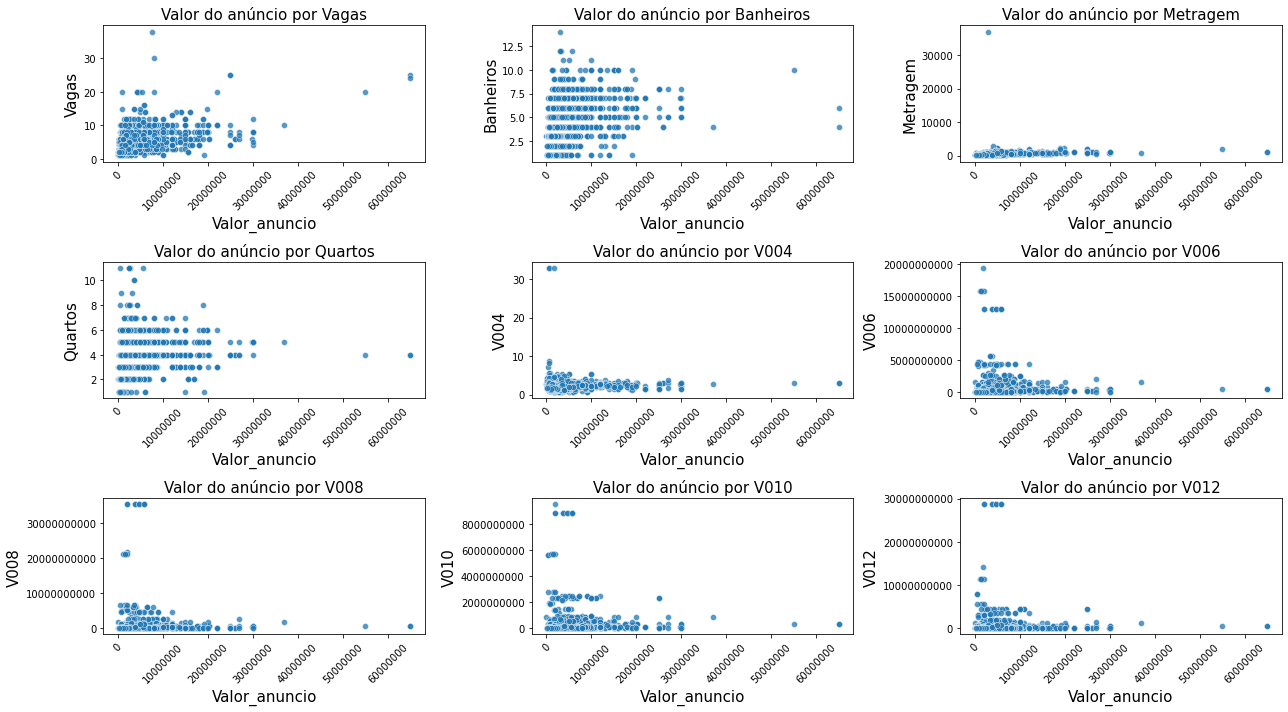

In [264]:
plt.figure(figsize=(18,10))

# Código do anunciante
plt.subplot(3,3,1)
ax1 = sns.scatterplot(x='Valor_anuncio', y='Vagas', data=data, palette='rainbow', alpha=0.75)
data_load(ax1 ,'Valor do anúncio por Vagas', 'Valor_anuncio','Vagas' )

# Views
plt.subplot(3,3,2)
ax2 = sns.scatterplot(x='Valor_anuncio', y='Banheiros', data=data, palette='rainbow', alpha=0.75)
data_load(ax2 ,'Valor do anúncio por Banheiros', 'Valor_anuncio','Banheiros' )

# Cliques telefone
plt.subplot(3,3,3)
ax3 = sns.scatterplot(x='Valor_anuncio', y='Metragem', data=data, palette='rainbow', alpha=0.75)
data_load(ax3 ,'Valor do anúncio por Metragem', 'Valor_anuncio','Metragem' )

# Código marca veículo
plt.subplot(3,3,4)
ax4 = sns.scatterplot(x='Valor_anuncio', y='Quartos', data=data, palette='rainbow', alpha=0.75)
data_load(ax4 ,'Valor do anúncio por Quartos', 'Valor_anuncio','Quartos' )

# Código modelo veículo
plt.subplot(3,3,5)
ax5 = sns.scatterplot(x='Valor_anuncio', y='V004', data=data, palette='rainbow', alpha=0.75)
data_load(ax5 ,'Valor do anúncio por V004', 'Valor_anuncio','V004' )

# Código versão veículo
plt.subplot(3,3,6)
ax6 = sns.scatterplot(x='Valor_anuncio', y='V006', data=data, palette='rainbow', alpha=0.75)
data_load(ax6 ,'Valor do anúncio por V006', 'Valor_anuncio','V006' )

# Ano modelo
plt.subplot(3,3,7)
ax7 = sns.scatterplot(x='Valor_anuncio', y='V008', data=data, palette='rainbow', alpha=0.75)
data_load(ax7 ,'Valor do anúncio por V008', 'Valor_anuncio','V008' )

# CEP
plt.subplot(3,3,8)
ax8 = sns.scatterplot(x='Valor_anuncio', y='V010', data=data, palette='rainbow', alpha=0.75)
data_load(ax8 ,'Valor do anúncio por V010', 'Valor_anuncio','V010' )

# Valor anúncio
plt.subplot(3,3,9)
ax9 = sns.scatterplot(x='Valor_anuncio', y='V012', data=data, palette='rainbow', alpha=0.75)
data_load(ax9 ,'Valor do anúncio por V012', 'Valor_anuncio','V012' )

ax1.ticklabel_format(style='plain', axis='x')
ax2.ticklabel_format(style='plain', axis='x')
ax3.ticklabel_format(style='plain', axis='x')
ax4.ticklabel_format(style='plain', axis='x')
ax5.ticklabel_format(style='plain', axis='x')
ax6.ticklabel_format(style='plain', axis='x')
ax7.ticklabel_format(style='plain', axis='x')
ax8.ticklabel_format(style='plain', axis='x')
ax9.ticklabel_format(style='plain', axis='x')

ax6.ticklabel_format(style='plain', axis='y')
ax7.ticklabel_format(style='plain', axis='y')
ax8.ticklabel_format(style='plain', axis='y')
ax9.ticklabel_format(style='plain', axis='y')

ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)
ax4.tick_params(axis='x', rotation=45)
ax5.tick_params(axis='x', rotation=45)
ax6.tick_params(axis='x', rotation=45)
ax7.tick_params(axis='x', rotation=45)
ax8.tick_params(axis='x', rotation=45)
ax9.tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace=0.3)  

plt.tight_layout()
    
plt.show()

## 4.2 Removendo valores discrepantes

In [265]:
# Substituindo outlierss
data['Valor_anuncio'] = data['Valor_anuncio'].apply(lambda x: 30000000 if (x > 30000000) else x)

data['Vagas'] = data['Vagas'].apply(lambda x: 10 if (x > 10) else x)

data['Banheiros'] = data['Banheiros'].apply(lambda x: 10 if (x > 10) else x)

data['Metragem'] = data['Metragem'].apply(lambda x: 1500 if (x > 10000) else x)

data['Quartos'] = data['Quartos'].apply(lambda x: 5 if (x > 10) else x)

data['V004'] = data['V004'].apply(lambda x: 2 if (x > 6) else x)

data['V006'] = data['V006'].apply(lambda x: 5000000000 if (x > 10000000000) else x)

data['V008'] = data['V008'].apply(lambda x: 8000000000 if (x > 8000000000) else x)

data['V010'] = data['V010'].apply(lambda x: 3000000000 if (x > 3000000000) else x)

data['V012'] = data['V012'].apply(lambda x: 1000000000 if (x > 3000000000) else x)

## 4.3 Checando

Como explicado no início desse módulo, os valores possíveis de serem substituídos foram alterados e os dados ficaram mais simétricos.

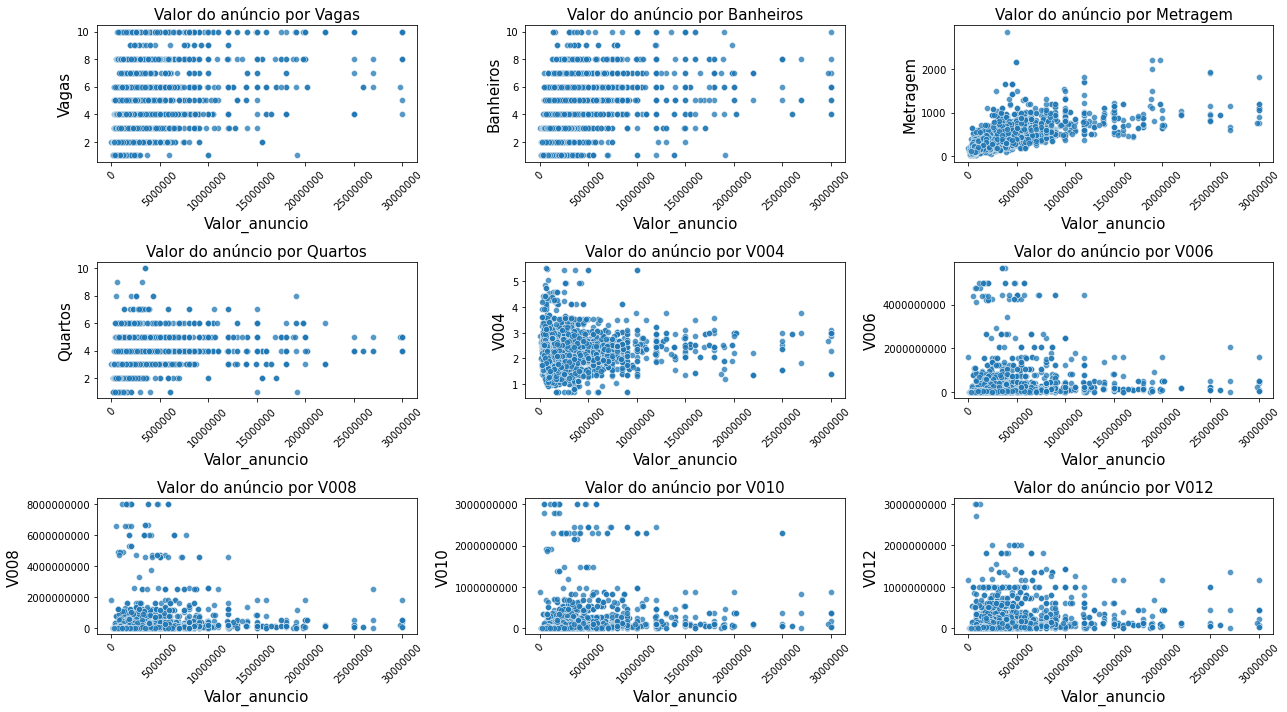

In [266]:
plt.figure(figsize=(18,10))

# Código do anunciante
plt.subplot(3,3,1)
ax1 = sns.scatterplot(x='Valor_anuncio', y='Vagas', data=data, palette='rainbow', alpha=0.75)
data_load(ax1 ,'Valor do anúncio por Vagas', 'Valor_anuncio','Vagas' )

# Views
plt.subplot(3,3,2)
ax2 = sns.scatterplot(x='Valor_anuncio', y='Banheiros', data=data, palette='rainbow', alpha=0.75)
data_load(ax2 ,'Valor do anúncio por Banheiros', 'Valor_anuncio','Banheiros' )

# Cliques telefone
plt.subplot(3,3,3)
ax3 = sns.scatterplot(x='Valor_anuncio', y='Metragem', data=data, palette='rainbow', alpha=0.75)
data_load(ax3 ,'Valor do anúncio por Metragem', 'Valor_anuncio','Metragem' )

# Código marca veículo
plt.subplot(3,3,4)
ax4 = sns.scatterplot(x='Valor_anuncio', y='Quartos', data=data, palette='rainbow', alpha=0.75)
data_load(ax4 ,'Valor do anúncio por Quartos', 'Valor_anuncio','Quartos' )

# Código modelo veículo
plt.subplot(3,3,5)
ax5 = sns.scatterplot(x='Valor_anuncio', y='V004', data=data, palette='rainbow', alpha=0.75)
data_load(ax5 ,'Valor do anúncio por V004', 'Valor_anuncio','V004' )

# Código versão veículo
plt.subplot(3,3,6)
ax6 = sns.scatterplot(x='Valor_anuncio', y='V006', data=data, palette='rainbow', alpha=0.75)
data_load(ax6 ,'Valor do anúncio por V006', 'Valor_anuncio','V006' )

# Ano modelo
plt.subplot(3,3,7)
ax7 = sns.scatterplot(x='Valor_anuncio', y='V008', data=data, palette='rainbow', alpha=0.75)
data_load(ax7 ,'Valor do anúncio por V008', 'Valor_anuncio','V008' )

# CEP
plt.subplot(3,3,8)
ax8 = sns.scatterplot(x='Valor_anuncio', y='V010', data=data, palette='rainbow', alpha=0.75)
data_load(ax8 ,'Valor do anúncio por V010', 'Valor_anuncio','V010' )

# Valor anúncio
plt.subplot(3,3,9)
ax9 = sns.scatterplot(x='Valor_anuncio', y='V012', data=data, palette='rainbow', alpha=0.75)
data_load(ax9 ,'Valor do anúncio por V012', 'Valor_anuncio','V012' )

ax1.ticklabel_format(style='plain', axis='x')
ax2.ticklabel_format(style='plain', axis='x')
ax3.ticklabel_format(style='plain', axis='x')
ax4.ticklabel_format(style='plain', axis='x')
ax5.ticklabel_format(style='plain', axis='x')
ax6.ticklabel_format(style='plain', axis='x')
ax7.ticklabel_format(style='plain', axis='x')
ax8.ticklabel_format(style='plain', axis='x')
ax9.ticklabel_format(style='plain', axis='x')

ax6.ticklabel_format(style='plain', axis='y')
ax7.ticklabel_format(style='plain', axis='y')
ax8.ticklabel_format(style='plain', axis='y')
ax9.ticklabel_format(style='plain', axis='y')

ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)
ax4.tick_params(axis='x', rotation=45)
ax5.tick_params(axis='x', rotation=45)
ax6.tick_params(axis='x', rotation=45)
ax7.tick_params(axis='x', rotation=45)
ax8.tick_params(axis='x', rotation=45)
ax9.tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace=0.3)  

plt.tight_layout()
    
plt.show()

In [267]:
# Checando outliers e valores vazios
NA1 = data.select_dtypes(['int32','int64', 'float64'])
NA1 = NA1.iloc[:,0:15]

Simetria = pd.DataFrame(NA1.apply(lambda x: x.skew())).round(2).T
Simetria.rename(index={0: 'Simetria'}, inplace=True)

Curtose = pd.DataFrame(NA1.apply(lambda x: x.kurtosis())).round(2).T
Curtose.rename(index={0: 'Curtose'}, inplace=True)

describe = NA1.describe().round(2)
m1 = pd.concat([describe, Simetria, Curtose], axis=0)
m1

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,V001,V002,V003,V004,V005,V006,V007,V008
count,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5.316000e+03,5316.00,5.316000e+03
mean,327.36,3.40,3.71,3.76,2700941.30,2.72,7637.50,192.86,573.01,3.01,2.10,5859.24,1.598875e+08,6790.83,1.902120e+08
std,243.07,0.98,1.83,2.16,3315780.67,3.55,4736.75,77.86,234.21,0.39,0.57,5107.95,5.262802e+08,5957.50,7.195892e+08
min,20.00,1.00,1.00,1.00,13000.00,0.01,65.00,12.00,29.00,1.61,0.70,174.91,9.835548e+04,584.26,7.002107e+04
25%,160.00,3.00,2.00,2.00,850000.00,0.85,4666.58,134.75,406.75,2.77,1.72,2437.72,7.993782e+06,2870.77,8.187213e+06
50%,255.00,3.00,3.00,3.00,1600000.00,1.60,6400.00,191.00,555.00,3.02,2.05,4385.96,2.693747e+07,5180.14,2.695591e+07
75%,410.00,4.00,5.00,5.00,3200000.00,3.20,9090.91,244.00,721.00,3.28,2.39,7600.23,9.586364e+07,8816.06,1.020006e+08
max,2850.00,10.00,10.00,10.00,30000000.00,65.00,54166.67,781.00,2488.00,5.21,5.52,41175.73,5.678613e+09,50741.20,8.000000e+09
Simetria,2.34,0.83,0.60,1.07,3.77,5.50,2.46,0.62,0.99,-0.20,1.24,2.41,6.850000e+00,2.59,7.790000e+00
Curtose,9.43,2.37,0.10,0.81,19.63,57.45,10.77,1.87,3.69,0.37,3.74,8.67,5.345000e+01,10.16,6.861000e+01


In [268]:
# Criando classe de curtose
Classe_curtose = pd.DataFrame(m1.loc["Curtose"].apply(lambda x:
                  'leptocúrtica_pos' if (x > 0)
                   else ' mesocúrtica' if (x == 0)
                   else 'platicúrtica_neg')).T
Classe_curtose.rename(index={'Curtose': 'Classe curtose'}, inplace=True)

#Criando classe de simetria
Classe_simetria = pd.DataFrame(m1.loc["Simetria"].apply(lambda x:
                  'quase simétrica' if (((x > 0) & (x < 0.5)) | ((x < 0) & (x > -0.5))) 
                   else 'médio enviesado' if (((x > 0.5) & (x < 1.0)) | ((x < -0.5) & (x > -1.0))) 
                   else 'muito enviesado')).T
Classe_simetria.rename(index={'Simetria': 'Classe_simetria'}, inplace=True)

m1 = pd.concat([m1, Classe_curtose, Classe_simetria], axis=0)
m1

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,V001,V002,V003,V004,V005,V006,V007,V008
count,5316.0,5316.0,5316.0,5316.0,5316.0,5316.0,5316.0,5316.0,5316.0,5316.0,5316.0,5316.0,5316.0,5316.0,5316.0
mean,327.36,3.4,3.71,3.76,2700941.3,2.72,7637.5,192.86,573.01,3.01,2.1,5859.24,159887547.45,6790.83,190211999.98
std,243.07,0.98,1.83,2.16,3315780.67,3.55,4736.75,77.86,234.21,0.39,0.57,5107.95,526280152.24,5957.5,719589193.09
min,20.0,1.0,1.0,1.0,13000.0,0.01,65.0,12.0,29.0,1.61,0.7,174.91,98355.48,584.26,70021.07
25%,160.0,3.0,2.0,2.0,850000.0,0.85,4666.58,134.75,406.75,2.77,1.72,2437.72,7993781.82,2870.77,8187213.28
50%,255.0,3.0,3.0,3.0,1600000.0,1.6,6400.0,191.0,555.0,3.02,2.05,4385.96,26937466.7,5180.14,26955910.12
75%,410.0,4.0,5.0,5.0,3200000.0,3.2,9090.91,244.0,721.0,3.28,2.39,7600.23,95863644.54,8816.06,102000570.47
max,2850.0,10.0,10.0,10.0,30000000.0,65.0,54166.67,781.0,2488.0,5.21,5.52,41175.73,5678612754.4,50741.2,8000000000.0
Simetria,2.34,0.83,0.6,1.07,3.77,5.5,2.46,0.62,0.99,-0.2,1.24,2.41,6.85,2.59,7.79
Curtose,9.43,2.37,0.1,0.81,19.63,57.45,10.77,1.87,3.69,0.37,3.74,8.67,53.45,10.16,68.61


In [269]:
# Checando outliers e valores vazios
NA2 = data.select_dtypes(['int32','int64', 'float64'])
NA2 = NA2.iloc[:,15:]

Simetria = pd.DataFrame(NA2.apply(lambda x: x.skew())).round(2).T
Simetria.rename(index={0: 'Simetria'}, inplace=True)

Curtose = pd.DataFrame(NA2.apply(lambda x: x.kurtosis())).round(2).T
Curtose.rename(index={0: 'Curtose'}, inplace=True)

describe = NA2.describe().round(2)
m2 = pd.concat([describe, Simetria, Curtose], axis=0)
m2

,V009,V010,V011,V012
count,5316.00,5.316000e+03,5316.00,5.316000e+03
mean,3247.50,9.344003e+07,4837.83,9.647384e+07
std,2261.85,3.088252e+08,3637.45,2.333146e+08
min,91.16,1.068146e+05,547.47,5.844021e+04
25%,1605.57,5.614213e+06,2303.08,6.241509e+06
50%,2788.53,1.814043e+07,4010.21,2.221859e+07
75%,4291.69,5.643614e+07,6182.71,7.019502e+07
max,20651.94,3.000000e+09,40653.97,2.986521e+09
Simetria,1.87,6.900000e+00,2.91,5.110000e+00
Curtose,5.91,5.273000e+01,18.14,3.497000e+01


In [270]:
# Criando classe de curtose
Classe_curtose = pd.DataFrame(m2.loc["Curtose"].apply(lambda x:
                  'leptocúrtica_pos' if (x > 0)
                   else ' mesocúrtica' if (x == 0)
                   else 'platicúrtica_neg')).T
Classe_curtose.rename(index={'Curtose': 'Classe curtose'}, inplace=True)

#Criando classe de simetria
Classe_simetria = pd.DataFrame(m2.loc["Simetria"].apply(lambda x:
                  'quase simétrica' if (((x > 0) & (x < 0.5)) | ((x < 0) & (x > -0.5))) 
                   else 'médio enviesado' if (((x > 0.5) & (x < 1.0)) | ((x < -0.5) & (x > -1.0))) 
                   else 'muito enviesado')).T
Classe_simetria.rename(index={'Simetria': 'Classe_simetria'}, inplace=True)

m2 = pd.concat([m2, Classe_curtose, Classe_simetria], axis=0)
m2

,V009,V010,V011,V012
count,5316.0,5316.0,5316.0,5316.0
mean,3247.5,93440026.09,4837.83,96473839.04
std,2261.85,308825244.47,3637.45,233314568.34
min,91.16,106814.59,547.47,58440.21
25%,1605.57,5614213.08,2303.08,6241508.75
50%,2788.53,18140427.35,4010.21,22218585.14
75%,4291.69,56436140.2,6182.71,70195016.01
max,20651.94,3000000000.0,40653.97,2986520776.46
Simetria,1.87,6.9,2.91,5.11
Curtose,5.91,52.73,18.14,34.97


### 4.3.1 Checando

Aqui iremos mostrar o boxplot das variáveis categóricas com o objetivo de observar categorias discrepantes e comparar os possíveis **desvios padrões**, **médias**, **quartis**, **medianas** com os valores dos anúncios e observar possíveis correlações futuras ja que são dados categóricos com numérico(valor do anúncio). Podemos observar que algumas features são equilibradas no desvio padrão da própria coluna e de suas categorias, como também esses mesmos desempenhos não são similiares(correlações maiores).

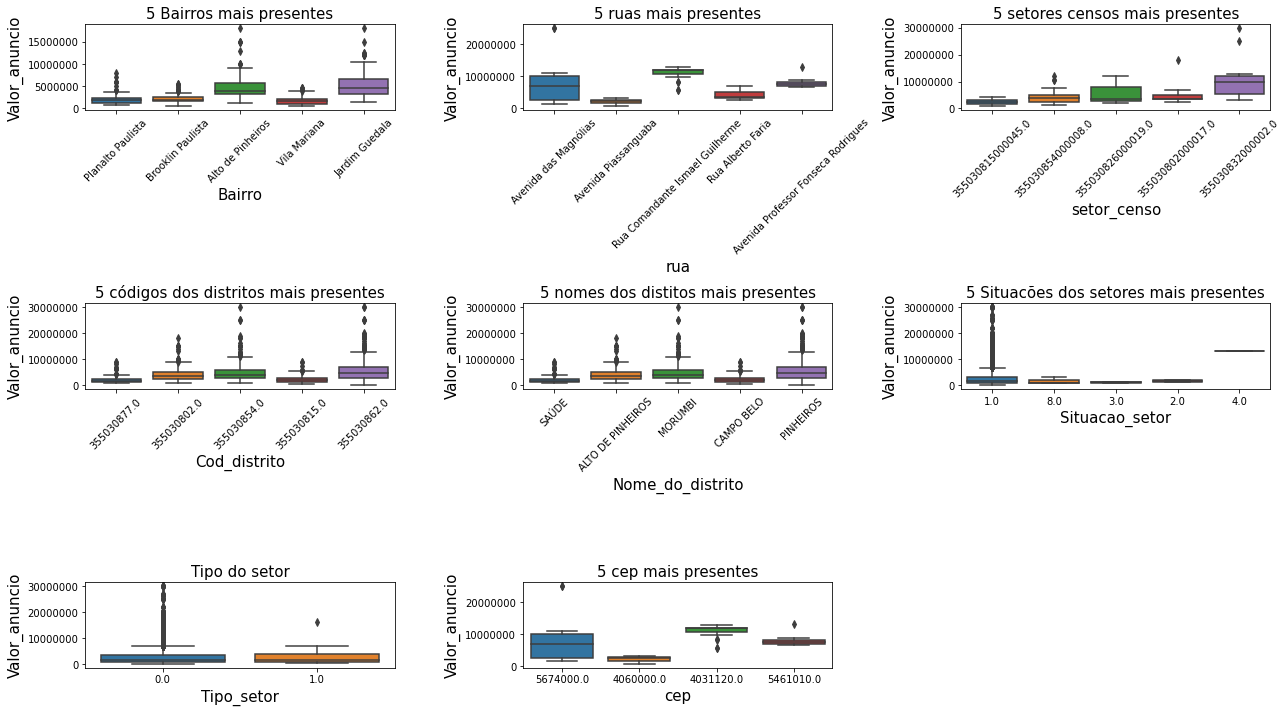

In [271]:
plt.figure(figsize=(18,10))

# Código do anunciante
plt.subplot(3,3,1)
ax1 = sns.boxplot(data = data\
.loc[(data['Bairro']=='Alto de Pinheiros') | (data['Bairro']=='Jardim Guedala') |
     (data['Bairro']=='Planalto Paulista') | (data['Bairro']=='Vila Mariana') | (data['Bairro']=='Brooklin Paulista') ], x="Bairro", y="Valor_anuncio")
data_load(ax1 ,'5 Bairros mais presentes', 'Bairro','Valor_anuncio' )

# Views
plt.subplot(3,3,2)
ax2 = sns.boxplot(data = data\
.loc[(data['rua']=='Rua Alberto Faria') | (data['rua']=='Avenida das Magnólias') |
     (data['rua']=='Rua Comandante Ismael Guilherme') | (data['rua']=='Avenida Professor Fonseca Rodrigues') | (data['rua']=='Avenida Piassanguaba') ], x="rua", y="Valor_anuncio")
data_load(ax2 ,'5 ruas mais presentes', 'rua','Valor_anuncio' )

# Cliques telefone
plt.subplot(3,3,3)
ax3 = sns.boxplot(data = data\
.loc[(data['setor_censo']=='355030802000017.0') | (data['setor_censo']=='355030854000008.0') |
     (data['setor_censo']=='355030832000002.0') | (data['setor_censo']=='355030826000019.0') | (data['setor_censo']=='355030815000045.0')], x="setor_censo", y="Valor_anuncio")
data_load(ax3 ,'5 setores censos mais presentes', 'setor_censo','Valor_anuncio' )

# Código marca veículo
plt.subplot(3,3,4)
ax4 = sns.boxplot(data = data\
.loc[(data['Cod_distrito']=='355030854.0') | (data['Cod_distrito']=='355030802.0') |
     (data['Cod_distrito']=='355030877.0') | (data['Cod_distrito']=='355030862.0') | (data['Cod_distrito']=='355030815.0')], x="Cod_distrito", y="Valor_anuncio")
data_load(ax4 ,'5 códigos dos distritos mais presentes', 'Cod_distrito','Valor_anuncio' )

# Código modelo veículo
plt.subplot(3,3,5)
ax5 = sns.boxplot(data = data\
.loc[(data['Nome_do_distrito']=='MORUMBI') | (data['Nome_do_distrito']=='ALTO DE PINHEIROS') |
     (data['Nome_do_distrito']=='SAÚDE') | (data['Nome_do_distrito']=='PINHEIROS') | (data['Nome_do_distrito']=='CAMPO BELO')], x="Nome_do_distrito", y="Valor_anuncio")
data_load(ax5 ,'5 nomes dos distitos mais presentes', 'Nome_do_distrito','Valor_anuncio' )

# Código versão veículo
plt.subplot(3,3,6)
ax6 = sns.boxplot(data = data\
.loc[(data['Situacao_setor']=='1.0') | (data['Situacao_setor']=='2.0') |
     (data['Situacao_setor']=='8.0') | (data['Situacao_setor']=='3.0') | (data['Situacao_setor']=='4.0') ], x="Situacao_setor", y="Valor_anuncio")
data_load(ax6 ,'5 Situacões dos setores mais presentes', 'Situacao_setor','Valor_anuncio' )

# Ano modelo
plt.subplot(3,3,7)
ax7 = sns.boxplot(data = data\
.loc[(data['Tipo_setor']=='0.0') | (data['Tipo_setor']=='1.0')], x="Tipo_setor", y="Valor_anuncio")
data_load(ax7 ,'Tipo do setor', 'Tipo_setor','Valor_anuncio' )

# CEP
plt.subplot(3,3,8)
ax8 = sns.boxplot(data = data\
.loc[(data['cep']=='5459000.0 ') | (data['cep']=='5674000.0') |
     (data['cep']=='4031120.0') | (data['cep']=='5461010.0') | (data['cep']=='4060000.0')], x="cep", y="Valor_anuncio")
data_load(ax8 ,'5 cep mais presentes', 'cep','Valor_anuncio' )

ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')
ax3.ticklabel_format(style='plain', axis='y')
ax4.ticklabel_format(style='plain', axis='y')
ax5.ticklabel_format(style='plain', axis='y')
ax6.ticklabel_format(style='plain', axis='y')
ax7.ticklabel_format(style='plain', axis='y')
ax8.ticklabel_format(style='plain', axis='y')

ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)
ax4.tick_params(axis='x', rotation=45)
ax5.tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace=0.3)  

plt.tight_layout()
    
plt.show()

## 4.4 Checkpoint

In [272]:
# cópia do data set
data_clean = data.copy()

In [273]:
# salvar o data set 
data_clean.to_csv('data_saves/data_clean.csv', index=False)

# checar a dimensão do data set 
data_clean.shape

(5316, 28)

## 4.5 Mapa de Hipóteses

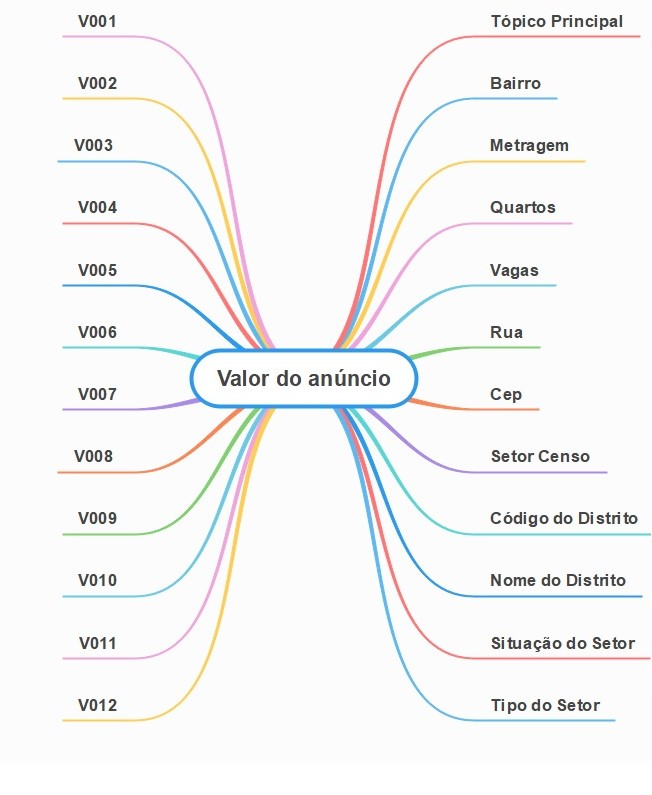

In [274]:
# Imagem do mapa de hipóteses
Image( 'images/Valor anuncio.jpg' )

## 4.6 Engenharia de Recursos

Neste tópico, a fim de melhorar o resultado final de Machine Learning, através de variáveis do dataset, criamos algumas features com novas informações para nos auxiliar.
* Através da coluna **cep** criamos 4 novas variáveis que são das **Sub_regiões**, **Setor**, **Sub_setor** e **Divisao_sub_setor** que são valores reais da cidade de São Paulo.

* Criamos também a **Quant_dom_part** que são as classificações de quantidades de domicílios particulares ou pessoas responsáveis por domicílios particulares permanentes e a **Quant_mor** que são as classificações de quantidades de moradores em domicílios particulares ou população residente em domicílios particulares permanentes


### 4.6.1 Sub Regiões

In [275]:
# Criando feature adicional
data_clean['cep'] = data_clean['cep'].astype(str)
data_clean['Sub_regiões'] = data_clean['cep'].str.extract('([0-9])')
data_clean['Sub_regiões'] = data_clean['Sub_regiões'].astype(str)

### 4.6.2 Setor, Sub-setor e Divisão do sub-setor

In [276]:
# Criando features adicionais
data_clean['Setor'] = data_clean['cep'].str[1]
data_clean['Sub_setor'] = data_clean['cep'].str[2]
data_clean['Divisao_sub_setor'] = data_clean['cep'].str[3]

# Alterando o dtype das features adicionais
data_clean['Setor'] = data_clean['Setor'].astype(str)
data_clean['Sub_setor'] = data_clean['Sub_setor'].astype(str)
data_clean['Divisao_sub_setor'] = data_clean['Divisao_sub_setor'].astype(str)

### 4.6.3 Domicílios particulares

In [277]:
# Criando feature adicional
data_clean['Quant_dom_part'] = ''
for idx, _ in data_clean.iterrows():
    if (data_clean['V001'].at[idx]<100):
        data_clean['Quant_dom_part'].at[idx]='Pouco domicílio'
    elif (data_clean['V001'].at[idx]>=100) & (data_clean['V001'].at[idx]<200):
        data_clean['Quant_dom_part'].at[idx]='Médio 1 domicílio'
    elif (data_clean['V001'].at[idx]>=200) & (data_clean['V001'].at[idx]<350):
        data_clean['Quant_dom_part'].at[idx]='Médio 2 domicílio'
    else:
        data_clean['Quant_dom_part'].at[idx]='Muito domicílio'

### 4.6.4  Moradores em domicílios particulares

In [278]:
# Criando feature adicional
data_clean['Quant_mor'] = ''
for idx, _ in data_clean.iterrows():
    if (data_clean['V002'].at[idx]<200):
        data_clean['Quant_mor'].at[idx]='Pouco morador'
    elif (data_clean['V002'].at[idx]>=200) & (data_clean['V002'].at[idx]<400):
        data_clean['Quant_mor'].at[idx]='Médio 1 morador'
    elif (data_clean['V002'].at[idx]>=400) & (data_clean['V002'].at[idx]<600):
        data_clean['Quant_mor'].at[idx]='Médio 2 morador'
    else:
        data_clean['Quant_mor'].at[idx]='Muito morador'

### 4.6.5 Checkpoint

In [279]:
# cópia do data set
data1 = data_clean.copy()

# salvar o data set 
data1.to_csv('data_saves/data1_f.csv', index=False)

# checar a dimensão do data set 
data1.shape

(5316, 34)

# 5 Questões e Hipóteses

**1**. Os 10 bairros com mais imóveis em São Paulo, seguem a mesma ordem nos somatório dos preços dos imóveis. 

**2**. Os 10 bairros com mais imóveis em São Paulo seguem a mesma ordem no número de vagas e quartos nos imóveis de acordo com suas metragens

**3**. Os 10 bairros com mais imóveis em São Paulo seguem a mesma ordem na faixa das metragens e preços/m² dos imóveis.

**4**. A maioria das médias de pessoas com rendimento nominal médio mensal, baixo possui imóvel com valor de m² baixo também.  

# 6 Análise Exploratória dos Dados

## 6.1 Análises Univariadas

### 6.1.1 Variável Alvo

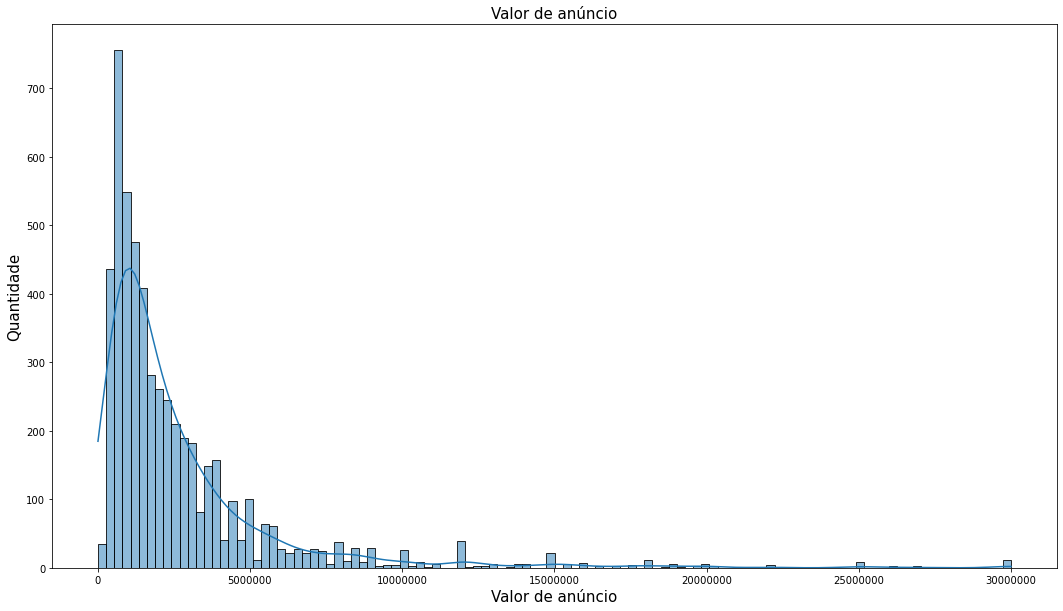

In [280]:
plt.figure(figsize=(18,10))
ax = sns.histplot(x=data1['Valor_anuncio'], kde=True)
data_load(ax,'Valor de anúncio', 'Valor de anúncio','Quantidade' )

plt.subplots_adjust(hspace=0.3)  

ax.ticklabel_format(style='plain', axis='x')
  
    
plt.show()

### 6.1.2 Variável Numérica

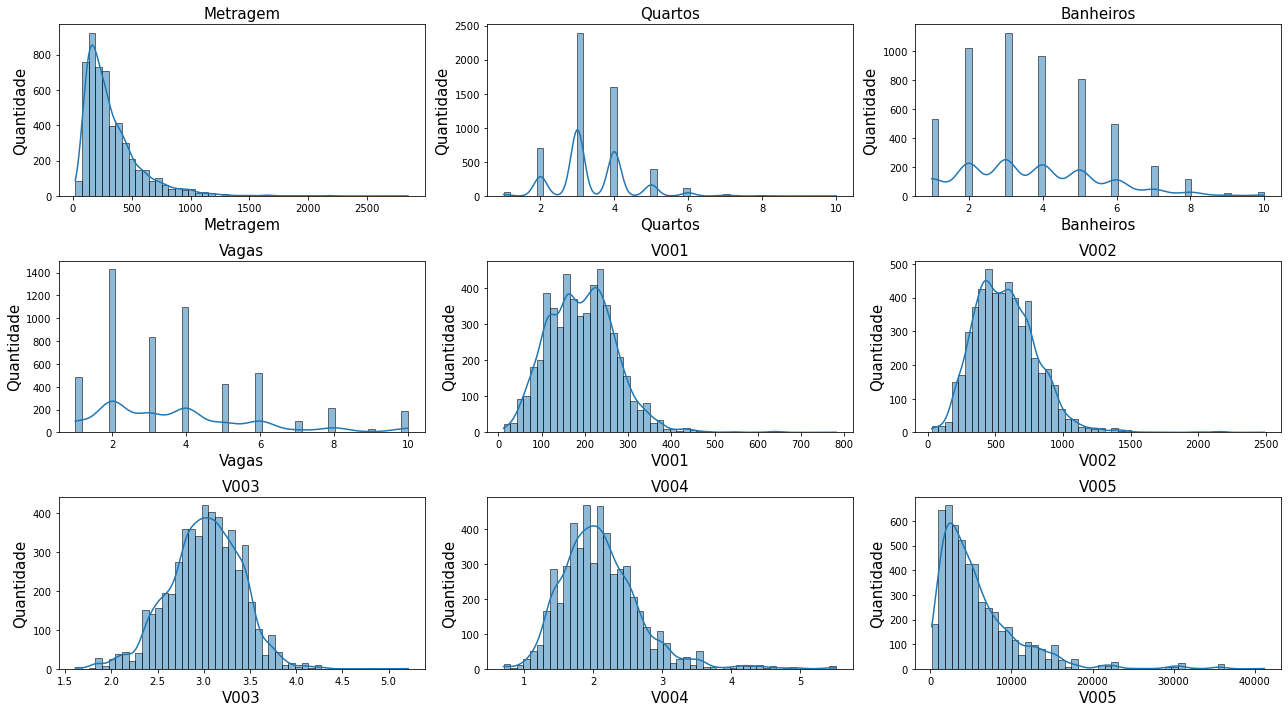

In [281]:
plt.figure(figsize=(18,10))

# Metragem
plt.subplot(3,3,1)
ax1 = sns.histplot(x=data1['Metragem'],bins=50, kde=True)
data_load(ax1,'Metragem', 'Metragem','Quantidade' )

# Quartos
plt.subplot(3,3,2)
ax2 = sns.histplot(x=data1['Quartos'],bins=50, kde=True)
data_load(ax2,'Quartos', 'Quartos','Quantidade' )

# Banheiros
plt.subplot(3,3,3)
ax3 = sns.histplot(x=data1['Banheiros'],bins=50, kde=True)
data_load(ax3,'Banheiros', 'Banheiros','Quantidade' )

# Vagas
plt.subplot(3,3,4)
ax4 = sns.histplot(x=data1['Vagas'],bins=50, kde=True)
data_load(ax4,'Vagas', 'Vagas','Quantidade' )

# V001
plt.subplot(3,3,5)
ax5 = sns.histplot(x=data1['V001'],bins=50, kde=True)
data_load(ax5,'V001', 'V001','Quantidade' )

# V002
plt.subplot(3,3,6)
ax6 = sns.histplot(x=data1['V002'],bins=50, kde=True)
data_load(ax6,'V002', 'V002','Quantidade' )

# V003
plt.subplot(3,3,7)
ax7 = sns.histplot(x=data1['V003'],bins=50, kde=True)
data_load(ax7,'V003', 'V003','Quantidade' )

# V004
plt.subplot(3,3,8)
ax8 = sns.histplot(x=data1['V004'],bins=50, kde=True)
data_load(ax8,'V004', 'V004','Quantidade' )

# V005
plt.subplot(3,3,9)
ax9 = sns.histplot(x=data1['V005'],bins=50, kde=True)
data_load(ax9,'V005', 'V005','Quantidade' )


plt.subplots_adjust(hspace=0.3)  

plt.tight_layout()
    
plt.show()

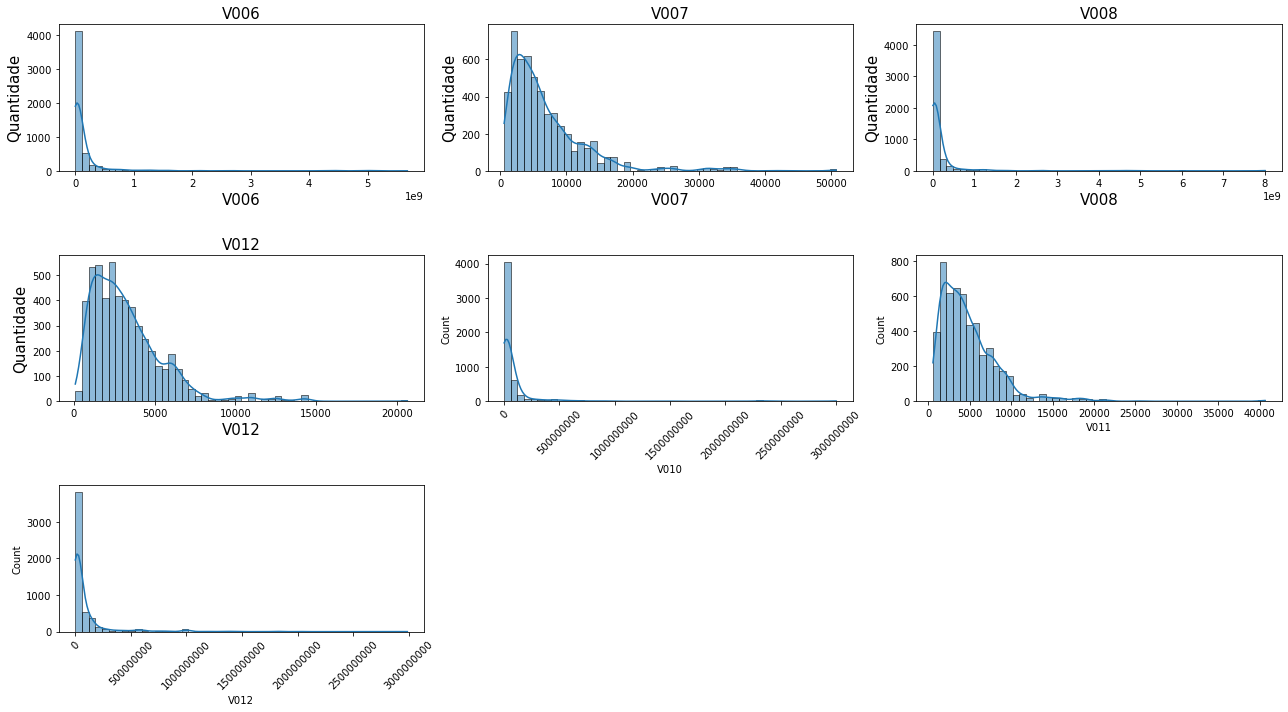

In [56]:
plt.figure(figsize=(18,10))

# V006
plt.subplot(3,3,1)
ax1 = sns.histplot(x=data1['V006'],bins=50, kde=True)
data_load(ax1,'V006', 'V006','Quantidade' )

# V007
plt.subplot(3,3,2)
ax2 = sns.histplot(x=data1['V007'],bins=50, kde=True)
data_load(ax2,'V007', 'V007','Quantidade' )

# V008
plt.subplot(3,3,3)
ax3 = sns.histplot(x=data1['V008'],bins=50, kde=True)
data_load(ax3,'V008', 'V008','Quantidade' )

# V009
plt.subplot(3,3,4)
ax3 = sns.histplot(x=data1['V009'],bins=50, kde=True)
data_load(ax3,'V009', 'V009','Quantidade' )

# V010
plt.subplot(3,3,5)
ax4 = sns.histplot(x=data1['V010'],bins=50, kde=True)
data_load(ax3,'V010', 'V010','Quantidade' )

# V011
plt.subplot(3,3,6)
ax5 = sns.histplot(x=data1['V011'],bins=50, kde=True)
data_load(ax3,'V011', 'V011','Quantidade' )

# V012
plt.subplot(3,3,7)
ax6 = sns.histplot(x=data1['V012'],bins=50, kde=True)
data_load(ax3,'V012', 'V012','Quantidade' )

ax4.ticklabel_format(style='plain', axis='x')
ax6.ticklabel_format(style='plain', axis='x')

ax4.tick_params(axis='x', rotation=45)
ax6.tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace=0.3)  

plt.tight_layout()
    
plt.show()

### 6.1.3 Variável Categórica

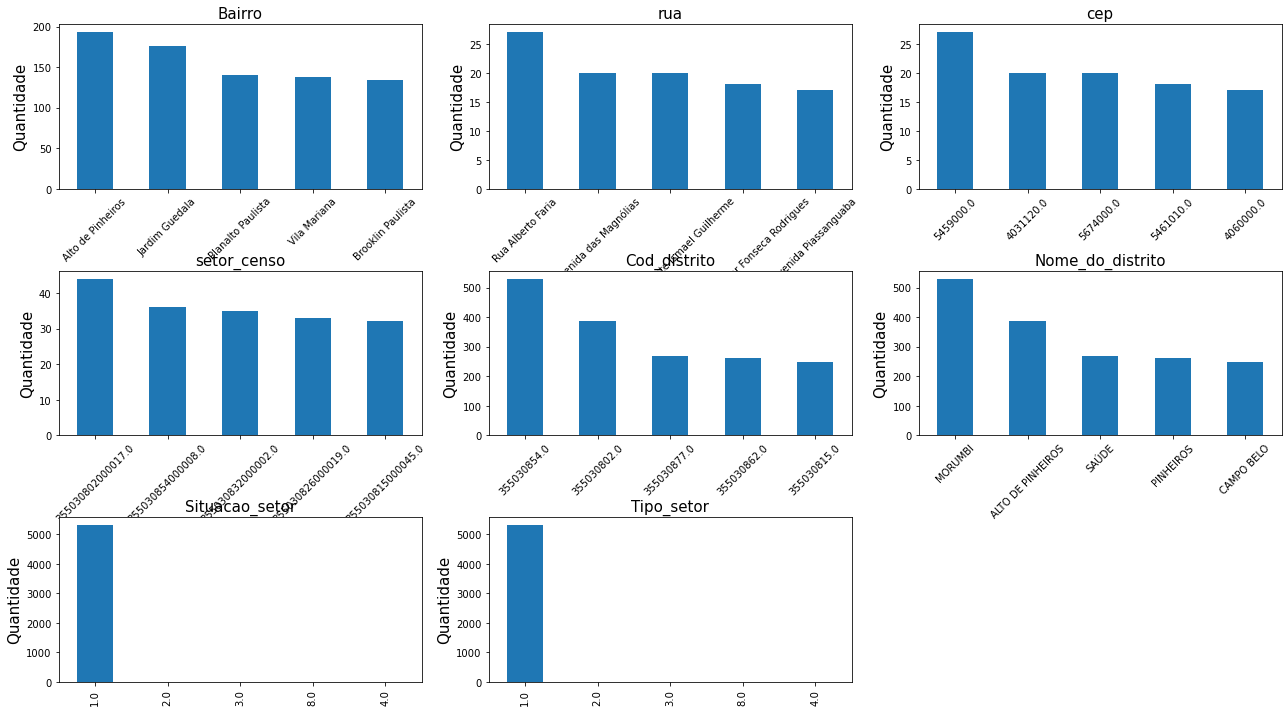

In [57]:
plt.figure(figsize=(18, 10))

# Bairro
plt.subplot(3,3,1)
data_plot = data1["Bairro"].value_counts()
ax1 = data_plot.head(5).plot.bar()
data_load(ax1,'Bairro', '','Quantidade' )

# rua
plt.subplot(3,3,2)
data_plot1 = data1["rua"].value_counts()
ax2 = data_plot1.head(5).plot.bar()
data_load(ax2,'rua', '','Quantidade' )

# cep
plt.subplot(3,3,3)
data_plot2 = data1["cep"].value_counts()
ax3 = data_plot2.head(5).plot.bar()
data_load(ax3,'cep', '','Quantidade' )

# setor_censo
plt.subplot(3,3,4)
data_plot3 = data1["setor_censo"].value_counts()
ax4 = data_plot3.head(5).plot.bar()
data_load(ax4,'setor_censo', '','Quantidade' )

# Cod_distrito
plt.subplot(3,3,5)
data_plot4 = data1["Cod_distrito"].value_counts()
ax5 = data_plot4.head(5).plot.bar()
data_load(ax5,'Cod_distrito', '','Quantidade' )

# Nome_do_distrito
plt.subplot(3,3,6)
data_plot5 = data1["Nome_do_distrito"].value_counts()
ax6 = data_plot5.head(5).plot.bar()
data_load(ax6,'Nome_do_distrito', '','Quantidade' )

# Situacao_setor
plt.subplot(3,3,7)
data_plot6 = data1["Situacao_setor"].value_counts()
ax7 = data_plot6.head(5).plot.bar()
data_load(ax7,'Situacao_setor', '','Quantidade' )

# Tipo_setor
plt.subplot(3,3,8)
data_plot7 = data1["Tipo_setor"].value_counts()
ax8 = data_plot6.head(5).plot.bar()
data_load(ax8,'Tipo_setor', '','Quantidade' )

ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)
ax4.tick_params(axis='x', rotation=45)
ax5.tick_params(axis='x', rotation=45)
ax6.tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.subplots_adjust(hspace=0.5)
  
plt.show()    

## 6.2 Análises Bivariadas

# HIPÓTESE 1

Os 10 bairros com mais imóveis em São Paulo, seguem a mesma ordem nos somatório dos preços dos imóveis. - **FALSO**

* Observamos que há uns maiores que os outros como **Brooklin Paulista** que é o 2º com mais imóveis atrás nos somatórios de preços de **Cidade Jardim** que é o 3º com mais imóveis. **Indicamos que o bairro de Brooklin Paulista pode ser uma opção mais fácil de compra de imóvel por ser o 2º bairro com mais imóveis em São Paulo e os preços mais baixos(somatório)**.

In [58]:
# 10 bairros com mais imóveis em São Paulo
top_bairros = data1["Bairro"].value_counts()[:10].index
top_bairros

# Somatório dos dados de cada bairro
dados_bairro = data1.groupby("Bairro").sum()
dados_bairro.reset_index(inplace = True)
dados_bairro

# Somatório dos dados dos 10 bairros com mais imóveis em São Paulo
dados_bairro.query("Bairro in @top_bairros")

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
4,Alto de Pinheiros,83324,761,897,896,927328210.0,927.328210,2.155737e+06,30975.0,102464.0,635.82,432.76,1905844.38,3.128784e+10,2150415.60,3.317242e+10,928704.93,1.553640e+10,1423459.09,2.059518e+10
17,Brooklin Paulista,41357,461,494,508,288973789.0,288.973789,1.004921e+06,25827.0,74127.0,389.29,245.17,691704.08,1.300405e+10,896683.83,1.770678e+10,420214.01,6.616022e+09,672335.13,1.007136e+10
48,Cidade Jardim,62704,376,490,549,556500900.0,556.500900,7.823439e+05,7109.0,23926.0,309.49,248.25,1353011.72,6.504136e+10,1827547.72,8.777554e+10,714167.31,9.360896e+10,1271596.16,5.039379e+10
138,Jardim Guedala,111779,725,997,1059,913829396.0,913.829396,1.432574e+06,17452.0,60320.0,615.00,469.35,2967939.96,1.305331e+11,3219936.83,1.373201e+11,1316658.16,6.622803e+10,1991047.32,6.057465e+10
188,Jardim Paulista,57087,442,561,530,861419000.0,861.419000,1.819440e+06,25121.0,71395.0,345.51,258.06,982911.14,4.826044e+10,1139719.75,5.731115e+10,561000.51,2.197579e+10,844978.05,3.305295e+10
278,Pacaembu,58377,475,537,589,514609500.0,514.609500,1.078442e+06,22914.0,73144.0,396.35,316.24,1094511.51,4.780343e+10,1165125.68,4.925895e+10,555423.95,1.932854e+10,743340.36,2.430578e+10
324,Planalto Paulista,45439,483,574,533,284810000.0,284.810000,9.106427e+05,30940.0,89242.0,402.98,296.37,505947.25,5.948554e+09,652421.77,6.539622e+09,315758.07,3.016664e+09,501388.73,4.004488e+09
345,Sumaré,31850,320,381,332,251235000.0,251.235000,7.506977e+05,19722.0,55417.0,252.29,169.53,534660.47,6.615674e+09,602709.86,6.941229e+09,337863.89,4.317696e+09,463559.37,5.309901e+09
467,Vila Madalena,36397,413,442,393,318534000.0,318.534000,1.059079e+06,21713.0,65664.0,353.20,237.12,830941.32,9.494192e+09,973814.19,9.864245e+09,455381.89,6.008782e+09,678558.82,7.490754e+09
471,Vila Mariana,31709,462,439,413,237390000.0,237.390000,1.067506e+06,31191.0,83424.0,375.79,239.81,713069.09,1.748828e+10,786614.05,2.167533e+10,453391.62,9.990619e+09,620990.59,9.834850e+09


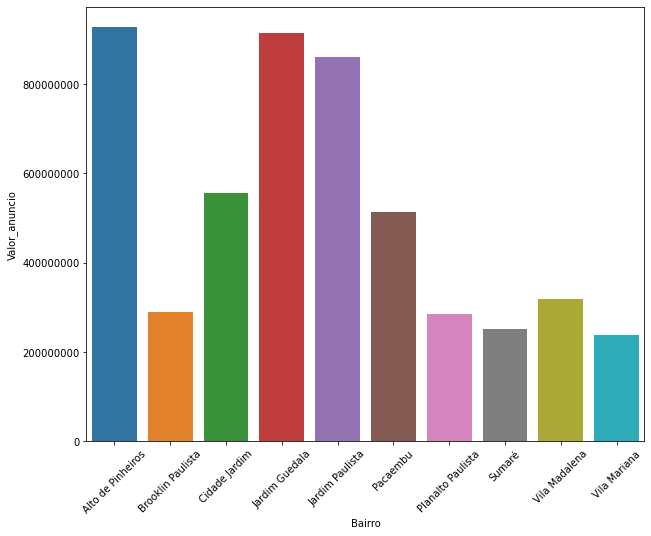

In [59]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Bairro", y="Valor_anuncio", data=dados_bairro.query("Bairro in @top_bairros"))
ax.tick_params(axis='x', rotation=45)

ax.ticklabel_format(style='plain', axis='y')
plt.show()  

# HIPÓTESE 2

Os 10 bairros com mais imóveis em São Paulo seguem a mesma ordem no número de vagas e quartos nos imóveis de acordo com suas metragens. - **VERDADEIRO**

* Observamos que todos os 10 bairros possuem similaridade quanto a ordem de vagas, quartos e metragens.

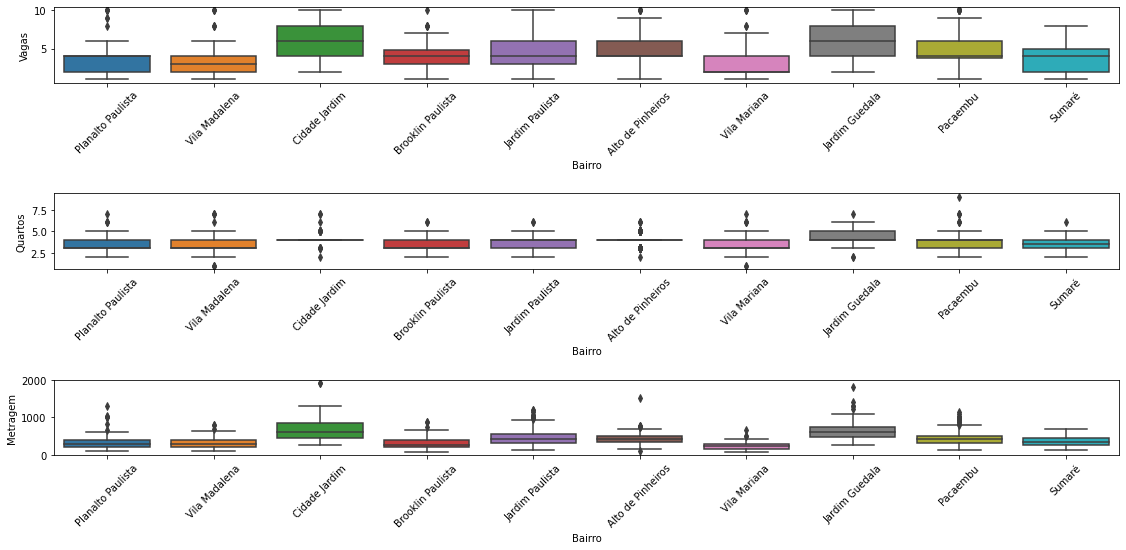

In [60]:
# Valor_m2 abaixo de 30000 devido aos valores discrepantes
plt.figure(figsize=(16, 8), tight_layout={'pad':2.0})

plt.subplot(3,1,1)
ax1 = sns.boxplot(data = data1.query("Bairro in @top_bairros"), x="Bairro", y="Vagas")
ax1.tick_params(axis='x', rotation=45)

plt.subplot(3,1,2)
ax2 = sns.boxplot(data = data1.query("Bairro in @top_bairros"), x="Bairro", y="Quartos")
ax2.tick_params(axis='x', rotation=45)

plt.subplot(3,1,3)
ax3 = sns.boxplot(data = data1.query("Bairro in @top_bairros"), x="Bairro", y="Metragem")
ax3.tick_params(axis='x', rotation=45)

plt.show()

# HIPÓTESE 3
Os 10 bairros com mais imóveis em São Paulo seguem a mesma ordem na faixa das metragens e preços/m² dos imóveis. - **FALSO**

* Observamos que há faixas de metragens maiores ou menores que outros e não seguem a mesma ordem da quantidade de imóveis por bairro. **Cidade Jardim** e **Jardim Guedala**  são os que possuem as faixas de maiores metragens. **Para pessoas que procuram conforto em relação ao tamanho do imóvel, procurem nos bairros Cidade Jardim ou Jardim Guedala que é onde possuem faixa de preços similares aos outros e metragens maiores**.

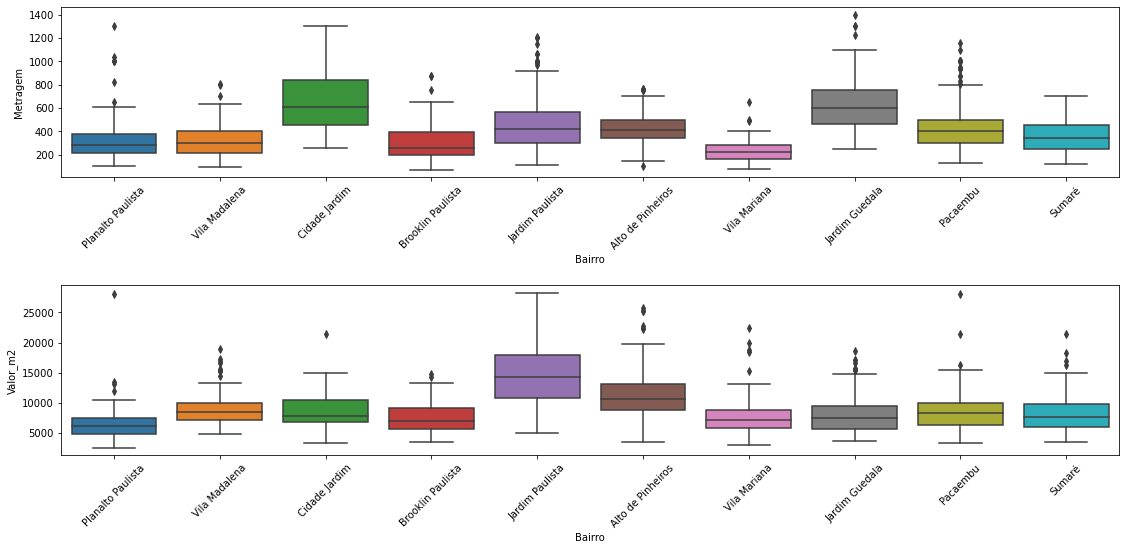

In [61]:
# Metragem abaixo de 1500 devido aos valores discrepantes
plt.figure(figsize=(16, 8), tight_layout={'pad':2.0})

plt.subplot(2,1,1)
ax = sns.boxplot(data = data1.query("Bairro in @top_bairros  & Metragem < 1500"), x="Bairro", y="Metragem")
ax.tick_params(axis='x', rotation=45)

plt.subplot(2,1,2)
a1 = sns.boxplot(data = data1.query("Bairro in @top_bairros & Valor_m2 < 30000"), x="Bairro", y="Valor_m2")
a1.tick_params(axis='x', rotation=45)

plt.show()

# HIPÓTESE 4
A maioria das médias de pessoas com rendimento nominal médio mensal baixo, possui imóvel com valor de m² baixo também. - **VERDADEIRO**

* Observamos que a maioria das médias de pessoas entre a faixa 0 e 20000 reais de renda média possuem imóveis com preço de m² entre 0 e 20000 reais, ou seja, baixo também. Alguns com renda baixa possuem imóveis com preço do m² mais caro e outros com renda alta, mas com imóveis com preço do m² mais barato, talvez por causa do bairro ou por opção mesmo. **Alertamos que pessoas com rendas mais baixas, não adquiram imóveis com valores muito altos como observamos no gráfico em algumas situações**.

Text(0.5, 0, 'Renda Média')

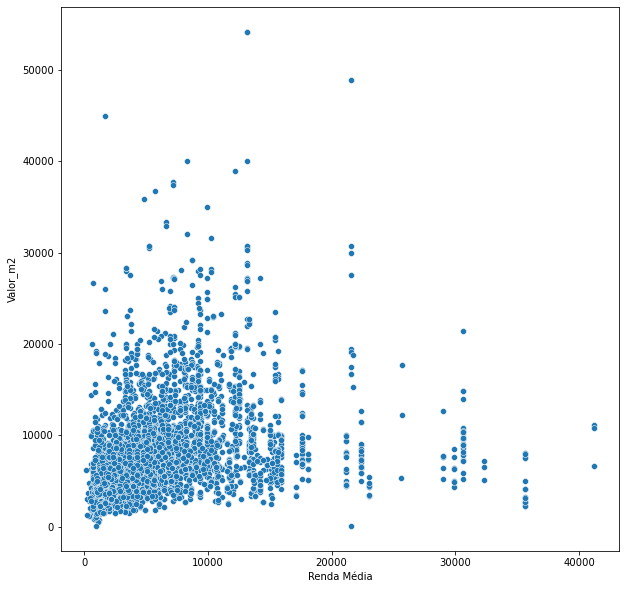

In [62]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = data1, x="V005", y="Valor_m2")
plt.xlabel('Renda Média')

### 6.2.1 Visão Global das Hipóteses

In [63]:
tab =[['Hypothesis', 'Conclusion', 'Relevance', 'Discover'],
      ['H1', 'Falso', 'Os 10 bairros com mais imóveis em São Paulo, seguem a mesma ordem nos somatório dos preços dos imóveis.'],  
      ['H2', 'Verdadeiro', 'Médio', 'Os 10 bairros com mais imóveis em São Paulo seguem a mesma ordem no número de vagas e quartos nos imóveis de acordo com suas metragens.'],  
      ['H3', 'Falso', 'Alto', 'Os 10 bairros com mais imóveis em São Paulo seguem a mesma ordem na faixa das metragens e preços/m² dos imóveis.'],
      ['H4', 'Verdadeiro', 'Alto', 'A maioria das médias de pessoas com rendimento nominal médio mensal baixo, possui imóvel com valor de m² baixo também.'],
     ]

print( tabulate( tab, headers='firstrow' ) )

Hypothesis    Conclusion    Relevance                                                                                                Discover
------------  ------------  -------------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------------
H1            Falso         Os 10 bairros com mais imóveis em São Paulo, seguem a mesma ordem nos somatório dos preços dos imóveis.
H2            Verdadeiro    Médio                                                                                                    Os 10 bairros com mais imóveis em São Paulo seguem a mesma ordem no número de vagas e quartos nos imóveis de acordo com suas metragens.
H3            Falso         Alto                                                                                                     Os 10 bairros com mais imóveis em São Paulo seguem a me

## 6.3 Análises Multivariadas

* Vamos dividir os atributos em categóricos, numérico e binários para fazer correlações entre eles.

* As variáveis consideradas categóricas alteramos os dtypes para 'category' com o bjetivo que fazer as correlações.

* Algumas variáveis serão excluídas, pois não terão mais utilidades.

### 6.3.1 Dtypes

Dados Numéricos:

* <code>Metragem<code>
* <code>Quartos<code> 
* <code>Banheiros<code> 
* <code>Vagas<code> 
* <code>Valor_anuncio<code> 
* <code>Valor_m2<code>     
* <code>V001<code> 
* <code>V002<code>
* <code>V003<code>     
* <code>V004<code>     
* <code>V005<code>     
* <code>V006<code> 
* <code>V007<code>     
* <code>V008<code>     
* <code>V009<code>     
* <code>V010<code>
* <code>V011<code>
* <code>V012<code>
    
Dados Categóricos:

* <code>Bairro<code>     
* <code>rua<code>     
* <code>cep<code>     
* <code>setor_censo<code>
* <code>Cod_distrito<code>
* <code>Nome_do_distrito<code>
* <code>Situacao_setor<code>     
* <code>Sub_regiões<code>     
* <code>Setor<code>     
* <code>Sub_setor<code>
* <code>Divisao_sub_setor<code>
* <code>Quant_dom_part<code>  
* <code>Quant_mor<code> 
    
Dados Binários:

* <code>Tipo_setor<code> 

In [282]:
data1 = pd.read_csv('data_saves/data1_f.csv', low_memory=False)

In [283]:
# Removendo vlr_mercado_2
data1 = data1.drop(['Valor', 'Valor_mm'], axis=1)
data1.head()

data1 = data1.reset_index(drop = True)

# salvar o data set 
data1.to_csv('data_saves/data1_d.csv', index=False)

In [284]:
# Dividindo os dados em binary, numerical e categorical
categorical = data1[['Bairro', 'rua','cep','setor_censo','Cod_distrito', 'Nome_do_distrito','Situacao_setor','Sub_regiões','Setor','Sub_setor','Divisao_sub_setor','Quant_dom_part','Quant_mor']]
numerical = data1[['Valor_anuncio', 'Valor_m2','Metragem','Quartos','Banheiros','Vagas','V001','V002','V003','V004','V005','V006','V007','V008','V009','V010','V011','V012']]
binary = data1[['Tipo_setor']]

In [285]:
# Transformando os Dtypes dos atributos categóricos 'category'
categorical = categorical.astype('category')

### 6.3.2 Atributos Numéricos

Nos atributos numéricos, observamos boas correlações entre as variáveis, principalmente com a variável alvo(Valor_anuncio). A melhor relação foi entre metragem quadrada do imóvel(Valor_m2) e variável alvo com **0.72**.

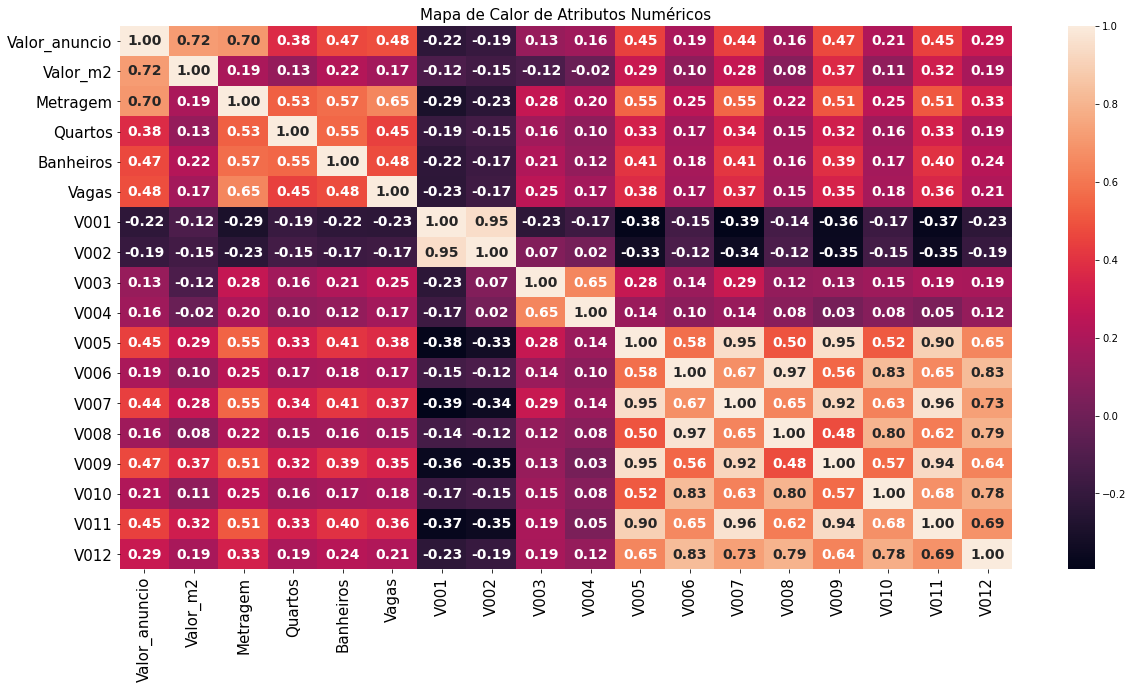

In [68]:
# Correlação entre dados int e float
NIF = numerical.select_dtypes(['int64','int32', 'float64'])
atributos_num = NIF.corr( method='pearson' )
plt.figure( figsize=(20, 10) )
ax1 = sns.heatmap(data=atributos_num, annot=True, fmt='.2f', annot_kws={'fontsize':14, 'fontweight':'bold'})
ax1.set_xticklabels(atributos_num, fontsize=15)
ax1.set_yticklabels(atributos_num, fontsize=15)
data_load(ax1, 'Mapa de Calor de Atributos Numéricos', '', '')

# 7.0 Data preprocessing

## 7.1 Separando data types

Com o objetivo de deixar a variável alvo mais simétrica, pegamos os logaritmos dos valores devido ao formato do gráfico de frequência favorecer.

In [286]:
# Variável alvo
Alvo_var = data1[['Valor_anuncio']]
Alvo_var['Valor_anuncio'] = np.log1p( Alvo_var['Valor_anuncio'] )

<ipython-input-286-66bf8204006d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



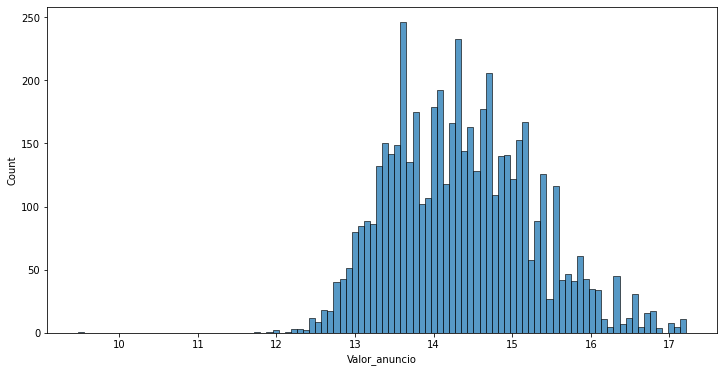

In [287]:
plt.figure(figsize=(12, 6))
ax1 = sns.histplot( Alvo_var['Valor_anuncio'], kde=False, bins=100  )

## 7.2 Normalização

Nesse módulo vamos utilizar o **StandardScaler** devido à simetria das features selecionadas e essa normalização é específica para esses tipos de dados.

In [288]:
numerical.drop(columns=['Valor_anuncio'], inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [289]:
# Instanciando a normalização 
escala_ss = StandardScaler()

numerical_ = escala_ss.fit(numerical[['Valor_m2','Metragem', 'Quartos', 'Banheiros', 'Vagas', 'V001', 'V002','V003','V004']])

numerical_1 = escala_ss.transform(numerical[['Valor_m2','Metragem', 'Quartos', 'Banheiros', 'Vagas', 'V001', 'V002','V003','V004']].values)

numerical_2 = pd.DataFrame(numerical_1, columns=numerical[['Valor_m2','Metragem', 'Quartos', 'Banheiros', 'Vagas', 'V001', 'V002','V003','V004']].columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [290]:
pickle.dump(escala_ss, open('models/Standard_scaler.pkl', 'wb'))

## 7.3 Reescalando

Nessa parte dos dados numéricos, utilizaremos o **MinMaxScaler** devido à baixa simetria dos dados e  facilitar na construção dos modelos de Machine Learning.

In [291]:
# Instanciando o reescalonamento 
escala_mm = MinMaxScaler()

numerical__ = escala_mm.fit(numerical[['V005','V006', 'V007', 'V008', 'V009', 'V010', 'V011','V012']])

numerical__1 = escala_mm.transform(numerical[['V005','V006', 'V007', 'V008', 'V009', 'V010', 'V011','V012']].values)

numerical__2 = pd.DataFrame(numerical__1, columns=numerical[['V005','V006', 'V007', 'V008', 'V009', 'V010', 'V011','V012']].columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



In [75]:
pickle.dump(escala_mm, open('models/MinMax_scaler.pkl', 'wb'))

## 7.4 Transformação

In [292]:
categorical.reset_index(drop=True, inplace=True)

categorical_2 = frequencias_codificadas(categorical)

## 7.5 Transformação das Variáveis

In [293]:
# Concatenando os dados de transformação de treino
data_conc = pd.concat([binary, numerical_2,numerical__2, categorical_2,Alvo_var], axis=1)

In [294]:
# Salvando dataset das transformações
data_conc.to_csv('data_saves/data_conc.csv', index=False)

# 8 Seleção de Recursos

## 8.1 Boruta

Devido à demora no carregamento, o modelo Boruta para seleção de features foi comentado, então analisamos as melhores correlações e, através de alguns testes, selecionamos apenas as 19 melhores colunas para aplicar nos modelos de Machine Learnig de regressão.

In [462]:
# Instanciando ExtraTreesClassifier e RandomForestClassifier
# RF_classifier = RandomForestClassifier(n_jobs=-1)
# ET_classifier = ExtraTreesClassifier(n_jobs=-1)

In [463]:
# X2 = data_conc.drop('Valor_anuncio', axis=1)
# y2 = data1[['Valor_anuncio']]

# splits nos dados de treino e teste
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=11)

In [ ]:
# Definindo Boruta
# boruta = BorutaPy(ET_classifier, n_estimators='auto', verbose=2, random_s# tate=42).fit(X2_train.values, y2_train.values.ravel())

In [ ]:
# Ranking das features
# cols_selected = boruta.support_.tolist()
# cols_selected_boruta =X2_train.iloc[:, cols_selected].columns.to_list()
# cols_selected_boruta

In [ ]:
# Plotando o ranking das features
# ET_classifier.fit(X2_train, y2_train)

# feat_importances = pd.Series(ET_classifier.feature_importances_, index=X2_train.columns)
# feat_importances.sort_values().plot(kind='barh')

# 9 Machine Learning

Nesse modelo aplicamos os modelos de Machine Learning e o algoritmo que melhor atendeu aos resultados necessários foi o modelo **Random Forest Regressor** com boa acurácia e média de erros baixo.

## 9.1 Treinando os modelos e calculando as métricas

In [295]:
data_conc = data_conc.astype(float)

Divisão dos dados em treino e teste.

In [329]:
X2 = data_conc[['Metragem', 'Vagas', 'Banheiros', 'Bairro', 'Quartos', 'V011', 'V007', 'V005',  'Cod_distrito', 'V009', 'Nome_do_distrito',
'cep', 'rua', 'setor_censo', 'Setor', 'Divisao_sub_setor', 'V003', 'Sub_regiões', 'V004']] 
y2 = data1[['Valor_anuncio']]

# splits nos dados de treino e teste
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=11)

## 9.2 Regressão Linear

In [297]:
# modelo
lr = LinearRegression().fit( X2_train, y2_train )

# predição
lr_pred = lr.predict( X2_test )

Model_Name = 'Linear Regression'
mae = mean_absolute_error( y2_test ,lr_pred )
mape = mean_absolute_percentage_error(y2_test, lr_pred)
rmse = np.sqrt( mean_squared_error( y2_test ,  lr_pred ) )
r2_test = r2_score(y2_test, lr_pred)

In [298]:
 lr_df = pd.DataFrame({'Model Name': Model_Name,
                        'MAE': mae,
                        'MAPE': mape,
                        'RMSE': rmse,
             'R2_Score' : r2_test},index=[0])
lr_df

,Model Name,MAE,MAPE,RMSE,R2_Score
0,Linear Regression,1.215935e+06,0.608115,2.240214e+06,0.545605


In [299]:
pickle.dump(lr, open('models/LinearRegression.pkl', 'wb'))

## 9.3 Random Forest Regressor

In [300]:
# modelo
rf = RandomForestRegressor( n_estimators=100, 
                           n_jobs=-1,         
                           random_state=11 ).fit( X2_train, y2_train )

# predição
rf_pred = rf.predict( X2_test )

Model_Name = 'Randon Forest Regressor'
mae = mean_absolute_error( y2_test ,rf_pred )
mape = mean_absolute_percentage_error(y2_test, rf_pred)
rmse = np.sqrt( mean_squared_error( y2_test ,  rf_pred ) )
r2_test = r2_score(y2_test, rf_pred)

<ipython-input-300-6d99a7d037ff>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [301]:
rf_df = pd.DataFrame({'Model Name': Model_Name,
                        'MAE': mae,
                        'MAPE': mape,
                        'RMSE': rmse,
             'R2_Score' : r2_test},index=[0])
rf_df

,Model Name,MAE,MAPE,RMSE,R2_Score
0,Randon Forest Regressor,655340.219122,0.252658,1.497535e+06,0.796947


In [302]:
pickle.dump(rf, open('models/RandomForestRegressor.pkl', 'wb'))

## 9.4 Lasso

In [303]:
# modelo
lrr   = Lasso( alpha=0.01 ).fit( X2_train, y2_train )

# predição
lrr_pred = lrr.predict( X2_test )

Model_Name = 'Lasso'
mae = mean_absolute_error( y2_test ,lrr_pred )
mape = mean_absolute_percentage_error(y2_test, lrr_pred)
rmse = np.sqrt( mean_squared_error( y2_test ,  lrr_pred ) )
r2_test = r2_score(y2_test, lrr_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.253e+15, tolerance: 4.668e+12



In [304]:
lrr_df = pd.DataFrame({'Model Name': Model_Name,
                        'MAE': mae,
                        'MAPE': mape,
                        'RMSE': rmse,
             'R2_Score' : r2_test},index=[0])
lrr_df

,Model Name,MAE,MAPE,RMSE,R2_Score
0,Lasso,1.215933e+06,0.608115,2.240212e+06,0.545605


In [305]:
pickle.dump(lrr, open('models/Lasso.pkl', 'wb'))

## 9.5 Performance dos modelos

In [306]:
# Criando dataframe para comparar as perfomnaces dos modelos
modelos = pd.concat([lr_df, rf_df, lrr_df])
modelos.sort_values('RMSE')

,Model Name,MAE,MAPE,RMSE,R2_Score
0,Randon Forest Regressor,6.553402e+05,0.252658,1.497535e+06,0.796947
0,Lasso,1.215933e+06,0.608115,2.240212e+06,0.545605
0,Linear Regression,1.215935e+06,0.608115,2.240214e+06,0.545605


Como observado, o modelo **Randon Forest Regressor** foi o que teve o melhor resultado do RMSE(1.497.535), logo vamos utiliza-lo para obter resultados mais precisos à frente. 

# 10 Cross validation

## 10.1 Cross validation para Random Forest Regressor

In [187]:
# Criar listas vazias para as métricas
mae_list = []
mape_list = []
rmse_list = []
r2_test_list = []

kfold = 5
# KFold
for k in reversed(range(1, kfold+1)):
    # Intervalo de 300 dados entre cada KFold escolhido aleatoriamente para teste
    CV1_Xtrain = X2.iloc[:5315-k*300]
    CV1_Xtest = X2.iloc[:5316-k*300]
    CV1_ytrain = y2.iloc[:5315-k*300]
    CV1_ytest = y2.iloc[:5316-k*300]
    
    # modelo
    rf = RandomForestRegressor( n_estimators=100, 
                           n_jobs=-1,         
                           random_state=11 ).fit( CV1_Xtrain, CV1_ytrain )

    # predição
    rf_pred = rf.predict( CV1_Xtest )

    Model_Name = 'Random Forest Regressor CV'
    mae = mean_absolute_error( CV1_ytest ,rf_pred )
    mape = mean_absolute_percentage_error(CV1_ytest, rf_pred)
    rmse = np.sqrt( mean_squared_error( CV1_ytest ,  rf_pred ) )
    r2_test = r2_score(CV1_ytest, rf_pred)


    # Armazenar as performances de cada KFold 
    mae_list.append(mae)
    mape_list.append(mape)
    rmse_list.append(rmse)
    r2_test_list.append(r2_test)

    # Dataframe para calcular as médias e desvios padrão de cada métrica
    CV_rf = pd.DataFrame({'Model Name': Model_Name,
                    'MAE CV': np.round(np.mean(mae_list), 2).astype(str) + ' +- ' + np.round(np.std(mae_list), 2).astype(str),
                    'MAPE CV': np.round(np.mean(mape_list), 2).astype(str) + ' +- ' + np.round(np.std(mape_list), 2).astype(str),
                    'RMSE CV': np.round(np.mean(rmse_list), 2).astype(str) + ' +- ' + np.round(np.std(rmse_list), 2).astype(str),
                    'R2_Score CV': np.round(np.mean(r2_test), 2).astype(str) + ' +- ' + np.round(np.std(r2_test), 2).astype(str)},
                    index=[0])
    CV_rf

<ipython-input-187-08556c4089e0>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor( n_estimators=100,
<ipython-input-187-08556c4089e0>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor( n_estimators=100,
<ipython-input-187-08556c4089e0>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor( n_estimators=100,
<ipython-input-187-08556c4089e0>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor( n_estimators=100,
<ipython-input-187-08556c4089e0>:17: Dat

In [188]:
CV_rf

,Model Name,MAE CV,MAPE CV,RMSE CV,R2_Score CV
0,Random Forest Regressor CV,224815.87 +- 12018.46,0.11 +- 0.0,505880.8 +- 21717.41,0.98 +- 0.0


## 10.2 Performances do Cross Validation

Nesse módulo podemos observar que o modelo **Random Forest Regressor CV** obteve o melhor resultado, continuando a frente dos outros modelos com boa acurácia e baixos erros.

In [189]:
# Criar um Dataframe de comparaçãos dos resultados
resultado_cv = pd.concat([CV_rf])
resultado_cv.sort_values('RMSE CV')

,Model Name,MAE CV,MAPE CV,RMSE CV,R2_Score CV
0,Random Forest Regressor CV,224815.87 +- 12018.46,0.11 +- 0.0,505880.8 +- 21717.41,0.98 +- 0.0


# 11 Hyperparâmetro

## 11.1 Busca aleatória

Escolhido o modelo a ser usado(**Random Forest Regressor CV**) devido à bons resultados, vamos aplicar os hyperparâmetros para melhorar ainda mais o resultado final.

In [125]:
# Parâmetros
param = {
    'n_estimators': [1500, 1700, 2500, 3000, 3500],
    'max_depth': [3, 5, 9]
}
# iterações
MAX_EVAL = 3

In [126]:
final_result = pd.DataFrame()

for i in range( MAX_EVAL ):
#choose values for parameters randomly
    hp = { k: random.sample( v, 1 )[0] for k, v in param.items() } # .items retorna os itens (key-values) de um dicionario
    print(hp)

    
    # Criar listas vazias para as métricas
    mae_list = []
    mape_list = []
    rmse_list = []
    r2_test_list = []

    kfold = 3
    # KFold
    for k in reversed(range(1, kfold+1)):
        
        CV1_Xtrain = X2.iloc[:5315-k*200]
        CV1_Xtest = X2.iloc[:5316-k*200]
        CV1_ytrain = y2.iloc[:5315-k*200]
        CV1_ytest = y2.iloc[:5316-k*200]
    
        # modelo
        rf = RandomForestRegressor(n_estimators=hp['n_estimators'],  
                               max_depth=hp['max_depth']  # max depth of the tree
                               ).fit(CV1_Xtrain, CV1_ytrain)

        # predição
        rf_pred = rf.predict( CV1_Xtest )

        Model_Name = 'RandomForestRegressor CV'
        mae = mean_absolute_error( CV1_ytest ,rf_pred )
        mape = mean_absolute_percentage_error(CV1_ytest, rf_pred)
        rmse = np.sqrt( mean_squared_error( CV1_ytest ,  rf_pred ) )
        r2_test = r2_score(CV1_ytest, rf_pred)


        # Armazenar as performances de cada KFold 
        mae_list.append(mae)
        mape_list.append(mape)
        rmse_list.append(rmse)
        r2_test_list.append(r2_test)

        # Dataframe para calcular as médias e desvios padrão de cada métrica
        xgb_rf = pd.DataFrame({'Model Name': Model_Name,
                        'MAE CV': np.round(np.mean(mae_list), 2).astype(str) + ' +- ' + np.round(np.std(mae_list), 2).astype(str),
                        'MAPE CV': np.round(np.mean(mape_list), 2).astype(str) + ' +- ' + np.round(np.std(mape_list), 2).astype(str),
                        'RMSE CV': np.round(np.mean(rmse_list), 2).astype(str) + ' +- ' + np.round(np.std(rmse_list), 2).astype(str),
                        'R2_Score CV': np.round(np.mean(r2_test), 2).astype(str) + ' +- ' + np.round(np.std(r2_test), 2).astype(str)},
                        index=[0])
    # performance
    final_result = pd.concat( [final_result, xgb_rf] )
final_result


{'n_estimators': 1700, 'max_depth': 9}


<ipython-input-126-1ce1899f76b4>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=hp['n_estimators'],
<ipython-input-126-1ce1899f76b4>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=hp['n_estimators'],
<ipython-input-126-1ce1899f76b4>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=hp['n_estimators'],


{'n_estimators': 3000, 'max_depth': 9}


<ipython-input-126-1ce1899f76b4>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=hp['n_estimators'],
<ipython-input-126-1ce1899f76b4>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=hp['n_estimators'],
<ipython-input-126-1ce1899f76b4>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=hp['n_estimators'],


{'n_estimators': 3000, 'max_depth': 9}


<ipython-input-126-1ce1899f76b4>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=hp['n_estimators'],
<ipython-input-126-1ce1899f76b4>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=hp['n_estimators'],
<ipython-input-126-1ce1899f76b4>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=hp['n_estimators'],


,Model Name,MAE CV,MAPE CV,RMSE CV,R2_Score CV
0,RandomForestRegressor CV,500683.83 +- 3832.45,0.26 +- 0.0,832328.55 +- 3306.65,0.94 +- 0.0
0,RandomForestRegressor CV,500801.31 +- 3577.01,0.26 +- 0.0,831438.43 +- 2680.52,0.94 +- 0.0
0,RandomForestRegressor CV,501396.37 +- 3530.91,0.26 +- 0.0,831822.79 +- 2363.2,0.94 +- 0.0


## 11.2 Modelo Final

Com o hyperparâmetro conseguimos saber quais melhores parâmetros para utilizar no modelo final de Machine Learning e obter um resultado mais preciso.

In [134]:
# creates the dict of final optimized params
Modelo_final = {
    'n_estimators': 3000,
    'max_depth': 9,
}

In [307]:
rf = RandomForestRegressor( n_estimators=Modelo_final['n_estimators'], 
                           max_depth=Modelo_final['max_depth']         
                           ).fit( X2_train, y2_train )

# predição
rf_pred = rf.predict( X2_test )

Model_Name = 'Randon Forest Regressor'
mae = mean_absolute_error( y2_test ,rf_pred )
mape = mean_absolute_percentage_error(y2_test, rf_pred)
rmse = np.sqrt( mean_squared_error( y2_test ,  rf_pred ) )
r2_test = r2_score(y2_test, rf_pred)

<ipython-input-307-86f09203b96f>:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [308]:
rf_df = pd.DataFrame({'Model Name': Model_Name,
                        'MAE': mae,
                        'MAPE': mape,
                        'RMSE': rmse,
             'R2_Score' : r2_test},index=[0])
rf_df

,Model Name,MAE,MAPE,RMSE,R2_Score
0,Randon Forest Regressor,751199.039667,0.301615,1.571333e+06,0.776442


# 12 Interpretação dos erros

Nesse módulo iremos juntar as predições com os valores reais de **Valor_anuncio**

In [330]:
data_erros = X2_test

# rescale
data_erros['Valor_anuncio'] =  y2_test['Valor_anuncio'] 
data_erros['Predições'] =  rf_pred 

data_erros.head(3)

,Metragem,Vagas,Banheiros,Bairro,Quartos,V011,V007,V005,Cod_distrito,V009,...,cep,rua,setor_censo,Setor,Divisao_sub_setor,V003,Sub_regiões,V004,Valor_anuncio,Predições
2975,-0.523998,-0.814198,-1.482628,0.010346,0.611159,0.043815,0.043201,0.058731,0.027464,0.082218,...,0.000564,0.000564,0.000564,0.103461,0.091234,-0.325823,0.369451,0.036366,1590000.0,1.233173e+06
4020,-0.799663,-0.814198,0.159611,0.000564,-0.406673,0.055777,0.056553,0.045425,0.029910,0.075241,...,0.000376,0.000376,0.000752,0.041949,0.116629,-0.685372,0.369451,-0.642929,850000.0,7.936869e+05
1769,-0.585714,-0.814198,-0.387802,0.010910,-0.406673,0.101246,0.098137,0.121572,0.049473,0.182086,...,0.000752,0.000752,0.000752,0.174944,0.098006,-2.457434,0.343303,-1.600910,2200000.0,2.053049e+06


Criamos o **melhor cenário** e **pior cenário** de acordo com valores maiores ou menores das predições de acordo com o erro médio absoluto obtido.

In [351]:
data_erros['MAE'] = 751199.039667

data_erros['Melhor_cenário'] = data_erros['Predições'] + data_erros['MAE']
data_erros['Pior_cenário'] = data_erros['Predições'] - data_erros['MAE']

In [331]:
mpe = mean_percentage_error(data_erros['Valor_anuncio'], data_erros['Predições'])
mpe

-0.1455053167312673

## 12.1 Performance de negócio

Esse projeto visa avaliar quanto vale um determinado imóvel na cidade de São Paulo que é usado como garantia de um empréstimo feito por um cliente na empresa **Creditas** .Após todas as análises exploratórias dos dados de imóveis de São Paulo e aplicações de modelos de Machine Learning, conseguimos obter as predições desses mesmos dados com uma boa acurácia e baixo erro. Com esses valores obtidos podemos estimar aproximadamente quanto a empresa **Creditas** vai poder emprestar à um possível cliente que deseje ter acesso a esse empréstimo.

In [352]:
data_erros['Valor_anuncio R$'] = data_erros['Valor_anuncio'].map('R${:,.2f}'.format)
data_erros['Predições R$'] = data_erros['Predições'].map('R${:,.2f}'.format)
data_erros['Melhor_cenário R$'] = data_erros['Melhor_cenário'].map('R${:,.2f}'.format)
data_erros['Pior_cenário R$'] = data_erros['Pior_cenário'].map('R${:,.2f}'.format)


data_erros[['Valor_anuncio R$','Predições R$', 'Melhor_cenário R$', 'Pior_cenário R$']]

,Valor_anuncio R$,Predições R$,Melhor_cenário R$,Pior_cenário R$
0,"R$1,590,000.00","R$1,233,172.73","R$1,984,371.77","R$481,973.69"
1,"R$850,000.00","R$793,686.89","R$1,544,885.93","R$42,487.85"
2,"R$2,200,000.00","R$2,053,048.69","R$2,804,247.73","R$1,301,849.65"
3,"R$2,680,000.00","R$3,293,382.71","R$4,044,581.75","R$2,542,183.67"
4,"R$2,300,000.00","R$3,009,435.92","R$3,760,634.96","R$2,258,236.88"
...,...,...,...,...
1059,"R$3,000,000.00","R$2,608,870.25","R$3,360,069.29","R$1,857,671.21"
1060,"R$4,500,000.00","R$3,827,499.45","R$4,578,698.49","R$3,076,300.41"
1061,"R$11,000,000.00","R$14,989,241.89","R$15,740,440.93","R$14,238,042.85"
1062,"R$2,300,000.00","R$2,773,104.12","R$3,524,303.16","R$2,021,905.08"


## 12.2 Variáveis de erros

Foram criadas 3 variáveis para  mostrar os resíduos e as taxas de erros de cada dado com o objetivo de facilitar o entendimento. A outra variável foi de índices para poder observar os dados nos gráficos mais detalhadamente.

In [353]:
# Indíces
data_erros = data_erros.reset_index()

# Criação das variáveis de erros e taxas de erros
data_erros['Erro'] = data_erros['Valor_anuncio'] - data_erros['Predições']
data_erros['Taxa_erro'] = data_erros['Predições'] / data_erros['Valor_anuncio']

data_erros.head()

,level_0,index,Metragem,Vagas,Banheiros,Bairro,Quartos,V011,V007,V005,...,Predições,Valor_anuncio R$,Predições R$,Erro,Taxa_erro,MAE,Melhor_cenário,Pior_cenário,Melhor_cenário R$,Pior_cenário R$
0,0,2975,-0.523998,-0.814198,-1.482628,0.010346,0.611159,0.043815,0.043201,0.058731,...,1.233173e+06,"R$1,590,000.00","R$1,233,172.73",356827.273301,0.775580,751199.039667,1.984372e+06,4.819737e+05,"R$1,984,371.77","R$481,973.69"
1,1,4020,-0.799663,-0.814198,0.159611,0.000564,-0.406673,0.055777,0.056553,0.045425,...,7.936869e+05,"R$850,000.00","R$793,686.89",56313.108085,0.933749,751199.039667,1.544886e+06,4.248785e+04,"R$1,544,885.93","R$42,487.85"
2,2,1769,-0.585714,-0.814198,-0.387802,0.010910,-0.406673,0.101246,0.098137,0.121572,...,2.053049e+06,"R$2,200,000.00","R$2,053,048.69",146951.312942,0.933204,751199.039667,2.804248e+06,1.301850e+06,"R$2,804,247.73","R$1,301,849.65"
3,3,801,0.533404,-0.351973,0.159611,0.017118,1.628991,0.098985,0.144777,0.164432,...,3.293383e+06,"R$2,680,000.00","R$3,293,382.71",-613382.714050,1.228874,751199.039667,4.044582e+06,2.542184e+06,"R$4,044,581.75","R$2,542,183.67"
4,4,4545,0.249510,-0.351973,0.707023,0.003198,-0.406673,0.211376,0.321383,0.342026,...,3.009436e+06,"R$2,300,000.00","R$3,009,435.92",-709435.918612,1.308450,751199.039667,3.760635e+06,2.258237e+06,"R$3,760,634.96","R$2,258,236.88"


### 12.2.1 Salvando

In [354]:
# Salvando dataset
data_erros.to_csv('data_saves/data_erros.csv', index=False)
# Salvando
pickle.dump( rf, open( 'models/modelo_final.pkl', 'wb' ) )

## 12.3 Performance do modelo

In [349]:
# Carregando dataset de performance
data_erros = pd.read_csv("data_saves/data_erros.csv")

* Nesse prmeiro gráfico podemos observar os dados não completamente iguais, com algumas diferenças, mas com uma certa similaridade entre os valores reais e as predições. 

* No segundo gráfico observamos a taxa de erro de cada valor de anúncio. Alguns poucos valores das predições 4 vezes maiores que o valor real de anúncio, mas em geral estão todos bem próximos um do outro(próximos de 1).

* No terceiro gráfico podemos observar as dispersões entre valor real e predições, no qual podemos notar que há uma boa correlação entre os 2 dados.

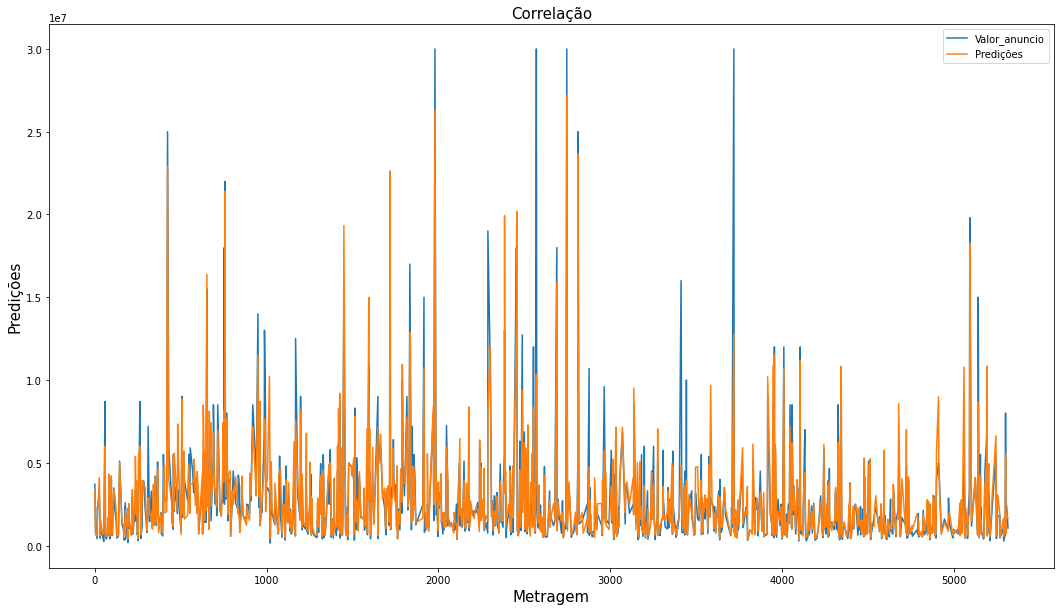

In [323]:
plt.figure(figsize=(18,10))

ax1 = sns.lineplot( x='index', y='Valor_anuncio', data=data_erros, label='Valor_anuncio', ci=None )
sns.lineplot( x='index', y='Predições', data=data_erros, label='Predições', ci=None )
data_load(ax1,'Correlação', 'index','Predições' )

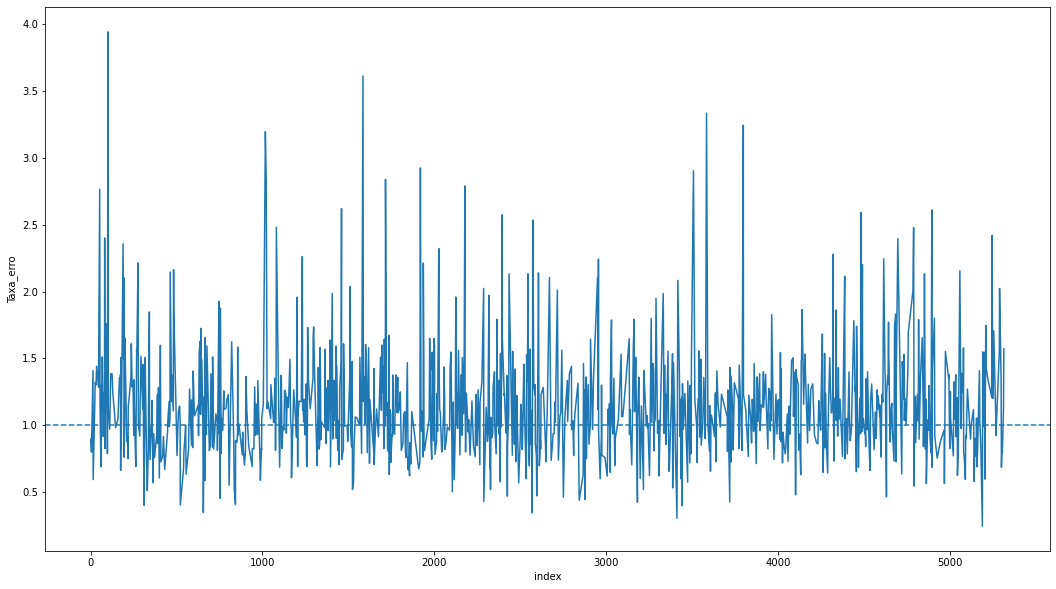

In [336]:
plt.figure(figsize=(18,10))

ax2 = sns.lineplot( x='index', y='Taxa_erro', data=data_erros )
data_load(ax1,'Taxa de erro', 'index','Predições' )
plt.axhline( 1, linestyle='--')

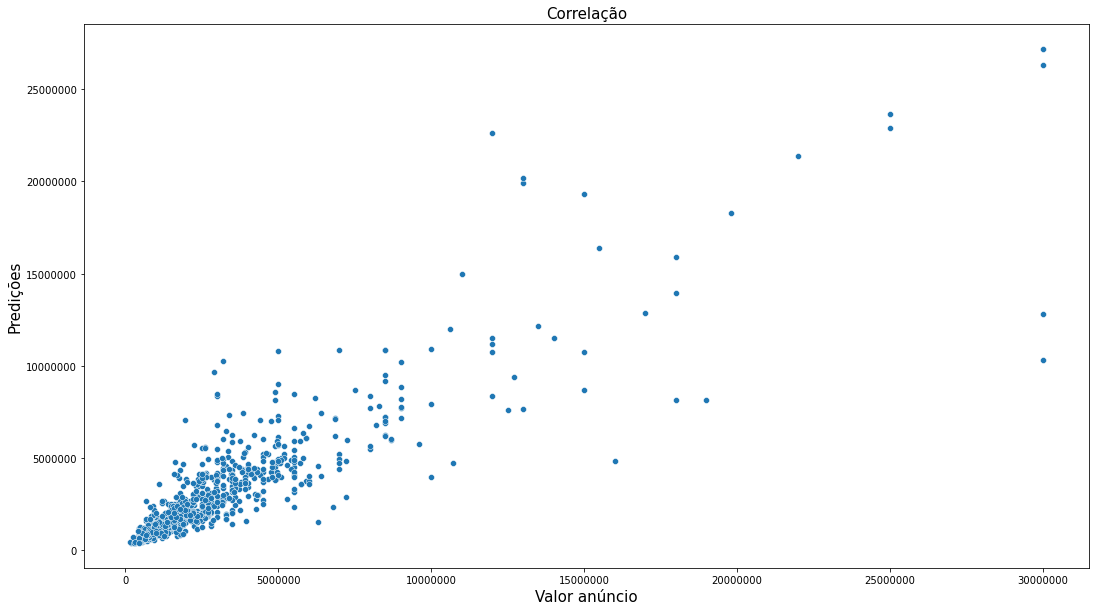

In [344]:
plt.figure(figsize=(18,10))

ax3 = sns.scatterplot(x = data_erros['Valor_anuncio'], y = data_erros['Predições'])
data_load(ax3,'Correlação', 'Valor anúncio','Predições' )

plt.subplots_adjust(hspace=0.3)  

ax3.ticklabel_format(style='plain', axis='x')
ax3.ticklabel_format(style='plain', axis='y')
  
    
plt.show()